In [1]:
#package et chargement fichiers

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
demo = pd.read_csv("C:/Users/pc/Downloads/Demographic_symptom.csv", sep=",", index_col = 0)


nettoyage des données

In [3]:


"""
intervalle de score attendus :

shaps : 14 à 56
psqi 0 à 21
madrs : 0 à 60
hamd 17 : 0 à 52
hamd 21 : 0 à 60
ham-a : 0 à 56
poms-tension : 0à 36
poms-depression : 0 à 60
poms-agressivité : 0 à48 
poms-fatigue : 0 à 28
poms-relation-pers : 0 à 28
poms-confusion : 0 à 28
poms-vigueur : 0 à 32
poms-total : -32 à 68
qids_sleep_score : 0 à 3
qids_appetite_score : 0 à 3
qids_psychomotor_score : 0 à 3
qids_total : 0 à 27

"""
#exploration
#afficher le détail du df
print(demo.head)
print(demo.info())


<bound method NDFrame.head of       batch   age     sex Diag  \
id                               
AA003   1st  45.0  Female   HC   
AA101   3rd  26.0  Female   HC   
AA115   1st  44.0  Female   HC   
AA296   2nd  27.0    Male   HC   
AA328   1st  51.0    Male  MDD   
...     ...   ...     ...  ...   
AN293   4th  24.0    Male  MDD   
AN330   4th  26.0    Male  MDD   
AN382   4th  25.0  Female  MDD   
AN466   4th  28.0    Male  MDD   
AN965   4th  29.0    Male  MDD   

                                     PrimaryDiagnosis  hs-CRP  shaps_score  \
id                                                                           
AA003                      Healthy_Control,_High_Risk     0.4         25.0   
AA101                                 Healthy_Control     NaN         15.0   
AA115                                 Healthy_Control     6.9         16.0   
AA296                                 Healthy_Control     0.6         14.0   
AA328  Major_Depressive_Disorder,_Recurrent,_Moderate     1

In [4]:
#redéfinir le nom de la colonne hs-CRP
demo.rename(columns={'hs-CRP': 'hs_CRP'}, inplace=True)


In [5]:

#filtre des valeurs abberrantes

shaps_filter = (demo.shaps_score >= 14) & (demo.shaps_score <= 56)
psqi_filter = demo.psqi_score <= 21
madrs_filter = demo.madrs_score <= 60
hamd17_filter = demo.hamd_hamd17_score <= 52
hamd21_filter = demo.hamd_hamd21_score <= 60
hama_filter = demo.hama_score <= 56
poms_filter_tension = demo.poms_score_tension <= 36
poms_filter_depression = demo.poms_score_depression <= 60
poms_filter_anger = demo.poms_score_anger <= 48
poms_filter_fatigue = demo.poms_score_fatigue <= 28
poms_filter_friendliness = demo.poms_score_friendliness<=28
poms_filter_confusion = demo.poms_score_confusion <= 28
poms_filter_vigour = demo.poms_score_vigour <= 32
poms_filter_tmd = (demo.poms_score_tmd >= -32) & (demo.poms_score_tmd <= 168)
qids_sleep_filter = demo.qids_sleep_score <= 3
qids_appetite_filter = demo.qids_appetite_score <= 3
qids_psychomotor_filter = demo.qids_psychomotor_score <= 3
qids_filter = demo.qids_score <= 27
MADRS_Q1_filter = (demo.MADRS_Q1 >= 0) & (demo.MADRS_Q1 <= 6)
MADRS_Q2_filter = (demo.MADRS_Q2 >= 0) & (demo.MADRS_Q2 <= 6)
MADRS_Q3_filter = (demo.MADRS_Q3 >= 0) & (demo.MADRS_Q3 <= 6)
MADRS_Q4_filter = (demo.MADRS_Q4 >= 0) & (demo.MADRS_Q4 <= 6)
MADRS_Q5_filter = (demo.MADRS_Q5 >= 0) & (demo.MADRS_Q5 <= 6)
MADRS_Q6_filter = (demo.MADRS_Q6 >= 0) & (demo.MADRS_Q6 <= 6)
MADRS_Q7_filter = (demo.MADRS_Q7 >= 0) & (demo.MADRS_Q7 <= 6)
MADRS_Q8_filter = (demo.MADRS_Q8 >= 0) & (demo.MADRS_Q8 <= 6)
MADRS_Q9_filter = (demo.MADRS_Q9 >= 0) & (demo.MADRS_Q9 <= 6)
MADRS_Q10_filter = (demo.MADRS_Q10 >= 0) & (demo.MADRS_Q10 <= 6)

all_filter_abber = shaps_filter & psqi_filter & madrs_filter & hamd17_filter & hamd21_filter & hama_filter & poms_filter_tension & poms_filter_depression & poms_filter_anger & poms_filter_fatigue & poms_filter_friendliness & poms_filter_confusion & poms_filter_vigour & poms_filter_tmd & qids_sleep_filter & qids_appetite_filter & qids_psychomotor_filter & qids_filter & MADRS_Q1_filter & MADRS_Q2_filter & MADRS_Q3_filter & MADRS_Q4_filter & MADRS_Q5_filter & MADRS_Q6_filter & MADRS_Q7_filter & MADRS_Q8_filter & MADRS_Q9_filter & MADRS_Q10_filter



In [6]:
#suppression des valeurs manquantes

nna_hs_CRP = demo.hs_CRP.notna()
shaps_nna = demo.shaps_score.notna()
psqi_nna = demo.psqi_score.notna()
madrs_nna = demo.madrs_score.notna()
hamd17_nna = demo.hamd_hamd17_score.notna()
hamd21_nna = demo.hamd_hamd21_score.notna()
hama_nna = demo.hama_score.notna()
poms_nna_tension = demo.poms_score_tension.notna()
poms_nna_depression = demo.poms_score_depression.notna()
poms_nna_anger = demo.poms_score_anger.notna()
poms_nna_fatigue = demo.poms_score_fatigue.notna()
poms_nna_friendliness = demo.poms_score_friendliness.notna()
poms_nna_confusion = demo.poms_score_confusion.notna()
poms_nna_vigour = demo.poms_score_vigour.notna()
poms_nna_tmd = demo.poms_score_tmd.notna()
qids_nna_psychomotor = demo.qids_psychomotor_score.notna()
qids_nna_sleep = demo.qids_sleep_score.notna()
qids_nna_appetite = demo.qids_appetite_score.notna()
qids_nna = demo.qids_score.notna()
MADRS_Q1_nna = demo.MADRS_Q1.notna()
MADRS_Q2_nna = demo.MADRS_Q2.notna()
MADRS_Q3_nna = demo.MADRS_Q3.notna()
MADRS_Q4_nna = demo.MADRS_Q4.notna()
MADRS_Q5_nna = demo.MADRS_Q5.notna()
MADRS_Q6_nna = demo.MADRS_Q6.notna()
MADRS_Q7_nna= demo.MADRS_Q7.notna()
MADRS_Q8_nna = demo.MADRS_Q8.notna()
MADRS_Q9_nna = demo.MADRS_Q9.notna()
MADRS_Q10_nna = demo.MADRS_Q10.notna()
ctq_denial_nna = demo.ctq_denial_score.notna()
ctq_emoabuse_nna = demo.ctq_emoabuse_score.notna()
ctq_emoneglect_nna = demo.ctq_emoneglect_score.notna()
ctq_physabuse_nna = demo.ctq_physabuse_score.notna()
ctq_physneglect_nna = demo.ctq_physneglect_score.notna()
ctq_sexabuse_nna = demo.ctq_sexabuse_score.notna()
ctq_score_nna = demo.ctq_score.notna()
tci_coop_nna = demo.tci_coop_score.notna()
tci_harmavoid_nna = demo.tci_harmavoid_score.notna()
tci_noveltyseek_nna = demo.tci_noveltyseek_score.notna()
tci_persistence_nna = demo.tci_persistence_score.notna()
tci_rewarddep_nna = demo.tci_rewarddep_score.notna()
tci_selfdirect_nna = demo.tci_selfdirect_score.notna()
tci_selftranscend_nna = demo.tci_selftranscend_score.notna()
tci_impulsivity_nna = demo.tci_impulsivity_score.notna()
PrimaryDiagnosis_nna = demo.PrimaryDiagnosis.notna()

all_nna_spd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna
all_nna_pd = nna_hs_CRP & shaps_nna & psqi_nna & madrs_nna & hamd17_nna & hamd21_nna & hama_nna & poms_nna_tension & poms_nna_depression & poms_nna_anger & poms_nna_fatigue & poms_nna_friendliness& poms_nna_confusion & poms_nna_vigour  & poms_nna_tmd & qids_nna_psychomotor & qids_nna_sleep & qids_nna_appetite & qids_nna & MADRS_Q1_nna & MADRS_Q2_nna & MADRS_Q3_nna & MADRS_Q4_nna & MADRS_Q5_nna & MADRS_Q6_nna & MADRS_Q7_nna & MADRS_Q8_nna & MADRS_Q9_nna & MADRS_Q10_nna & ctq_denial_nna & ctq_emoabuse_nna & ctq_emoneglect_nna & ctq_physabuse_nna & ctq_physneglect_nna & ctq_sexabuse_nna & ctq_score_nna & tci_coop_nna & tci_harmavoid_nna & tci_noveltyseek_nna & tci_persistence_nna & tci_rewarddep_nna & tci_selfdirect_nna & tci_selftranscend_nna & tci_impulsivity_nna & PrimaryDiagnosis_nna


In [7]:
#création des dataset spd et pd
all_filter_spd = all_nna_spd & all_filter_abber
all_filter_pd = all_nna_pd & all_filter_abber

demo_net_spd = demo[all_filter_spd]
demo_net_pd = demo[all_filter_pd]

demo_net_spd = demo_net_spd.drop(["PrimaryDiagnosis"], axis=1)
demo_net_spd.info()
demo_net_pd.info()


<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   batch                    123 non-null    object 
 1   age                      123 non-null    float64
 2   sex                      123 non-null    object 
 3   Diag                     123 non-null    object 
 4   hs_CRP                   123 non-null    float64
 5   shaps_score              123 non-null    float64
 6   psqi_score               123 non-null    float64
 7   ctq_denial_score         123 non-null    float64
 8   ctq_emoabuse_score       123 non-null    float64
 9   ctq_emoneglect_score     123 non-null    float64
 10  ctq_physabuse_score      123 non-null    float64
 11  ctq_physneglect_score    123 non-null    float64
 12  ctq_sexabuse_score       123 non-null    float64
 13  ctq_score                123 non-null    float64
 14  madrs_score              

In [8]:
#renommer les colonnes des questions madrs
demo_net_spd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)

demo_net_pd.rename(columns={'MADRS_Q1': 'tristesse_apparente',
                     'MADRS_Q2': 'tristesse_exprimee',
                     'MADRS_Q3': 'tension_interieure',
                     'MADRS_Q4': 'reduction_sommeil',
                     'MADRS_Q5': 'reduction_appetit',
                     'MADRS_Q6': 'difficulte_concentration',
                     'MADRS_Q7': 'lassitude',
                     'MADRS_Q8': 'incapacite_ressentir',
                     'MADRS_Q9': 'pensee_pessimiste',
                     'MADRS_Q10': 'idee_suicidaire'},
                     inplace=True)

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


ANALYSE DE DONNEES

STATISTIQUES A PARTIR DU DATASET SANS LA COLONNE PRIMARY DIAGNOSIS

In [12]:
#create crosstab sex diag
t = pd.crosstab(demo_net_spd.Diag, "freq")
s = pd.crosstab(demo_net_spd.sex, "freq")
print(t)
print(s)


col_0  freq
Diag       
HC       74
MDD      49
col_0   freq
sex         
Female    67
Male      56


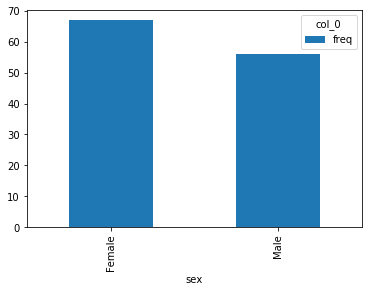

In [13]:
# Creation des diagrammes en barre des variables Diag et sex
s.plot.bar()
plt.show()


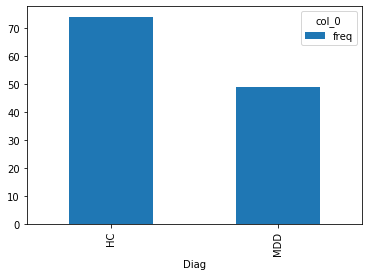

In [14]:
t.plot.bar()
plt.show()

On remarque qu'il y a plus de femmes que d'hommes dans l'échantillon. Toutefois, on ne peut pas s'avancer sur le fait que la différence soit significative pour l'instant. Aussi, on observe plus d'individus sains que d'individus souffrant de dépression.

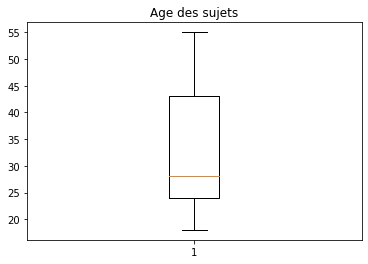

In [12]:
plt.boxplot(demo_net_spd.age)
plt.title('Age des sujets')
plt.show()


La boîte à moustache nous permet de dire que la moitié de l'échantillon a approximativement entre 24 et 43ans, avec une médiane se situant à 28ans. Les âges varient environ de 18 à 55ans. L'échantillon est ainsi composé pour moitié de jeunes adultes ayant entre 18 et 28ans.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000147CFF41F10>,
      dtype=object)

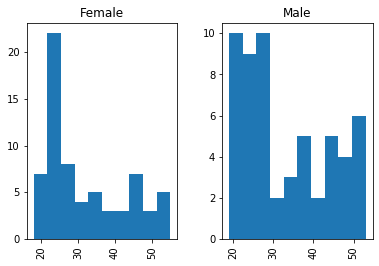

In [13]:
demo_net_spd.hist(column='age',by='sex')

Ces histogrammes représentent les âges des individus de l'échantillon en fonction du sexe. On remarque que la répartition des âges est plus homogène chez les hommes que chez les femmes. Aussi on observe un pic de 20 femmes entre 23 et 25 ans.

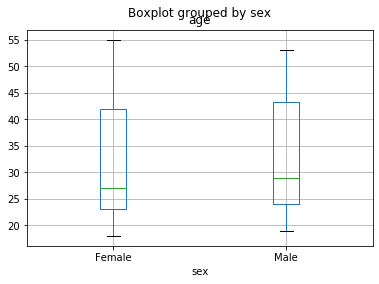

In [14]:
demo_net_spd.boxplot(column='age',by='sex')

La médiane des ages chez les femmes est à 27 ans, chez les hommes elle est à 29 ans. La population des femmes est relativement plus jeune que celle des hommes. 

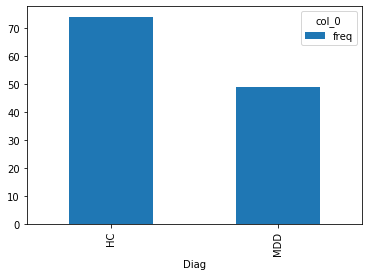

In [15]:

t.plot.bar()
plt.show()


On observe plus d'individus diagnostiqués non dépressifs que d'individus souffrant de dépression. Il faudrait vérifier si cette différence est significative.

Diag          HC       MDD
sex                       
Female  0.567164  0.432836
Male    0.642857  0.357143


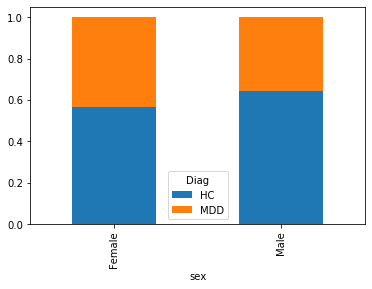

In [16]:
ct = pd.crosstab(demo_net_spd['sex'],demo_net_spd['Diag'],normalize='index')
print(ct)
ct.plot.bar(stacked=True)

Près de la moitié des femmes est diagnostiquée en dépression. près d'1/3 des hommes est diagnostiqué en dépression.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000147D013C5E0>,
      dtype=object)

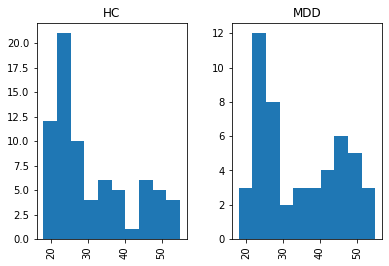

In [17]:
demo_net_spd.hist(column='age',by='Diag')

On observe plus de personnes diagnostiquées positives à partirde 40 ans, par rapport à la dispersion du groupe contrôle.

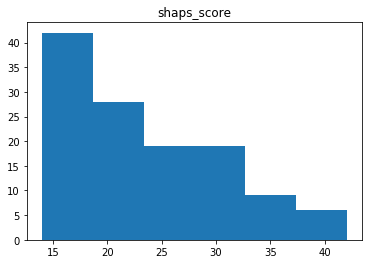

In [18]:
plt.hist(demo_net_spd.shaps_score, bins = 6)
plt.title("shaps_score")
plt.show()

Le nombre d'individus diminue avec l'augmentation du score au SHAPS (mesure l'anhédonie)

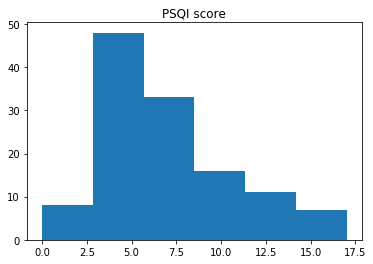

In [19]:

plt.hist(demo_net_spd.psqi_score, bins=6)
plt.title('PSQI score')
plt.show()

Au PSQI, la majorité des individus semble avoir des scores entre 2 et 10. Des scores plus élevés deviennent plus rares

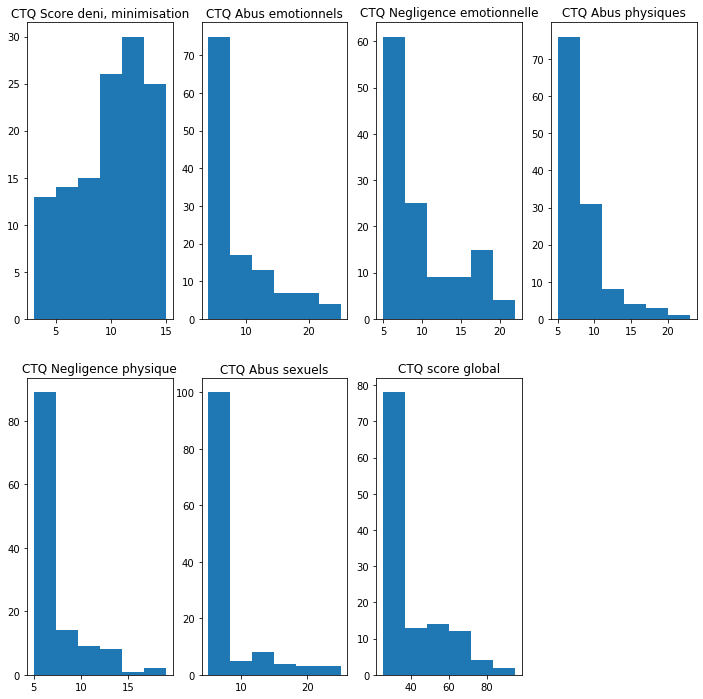

In [15]:

fig1 = plt.figure(figsize =(12,12))
ax11 = fig1.add_subplot(2,4,1)
ax21 = fig1.add_subplot(2,4,2)
ax31 = fig1.add_subplot(2,4,3)
ax41 = fig1.add_subplot(2,4,4)
ax51 = fig1.add_subplot(2,4,5)
ax61 = fig1.add_subplot(2,4,6)
ax71 = fig1.add_subplot(2,4,7)
ax11.title.set_text('CTQ Score deni, minimisation')
ax21.title.set_text('CTQ Abus emotionnels')
ax31.title.set_text('CTQ Negligence emotionnelle')
ax41.title.set_text('CTQ Abus physiques')
ax51.title.set_text('CTQ Negligence physique')
ax61.title.set_text('CTQ Abus sexuels')
ax71.title.set_text('CTQ score global')
ax11.hist(demo_net_spd.ctq_denial_score,bins = 6)
ax21.hist(demo_net_spd.ctq_emoabuse_score,bins = 6)
ax31.hist(demo_net_spd.ctq_emoneglect_score,bins = 6)
ax41.hist(demo_net_spd.ctq_physabuse_score,bins = 6)
ax51.hist(demo_net_spd.ctq_physneglect_score,bins = 6)
ax61.hist(demo_net_spd.ctq_sexabuse_score,bins = 6)
ax71.hist(demo_net_spd.ctq_score,bins = 6)
plt.show()

La plupart des individus de l'échantillon a un score élevé à l'échelle déni du CTQ. En ce qui concerne les autres échelles du CTQ, on observe l'effet inverse : la majorité des individus a des scores bas à ces dernières. Il semble toutefois y avoir des scores plus élevés à l'échelle "négligence émotionnelle". 

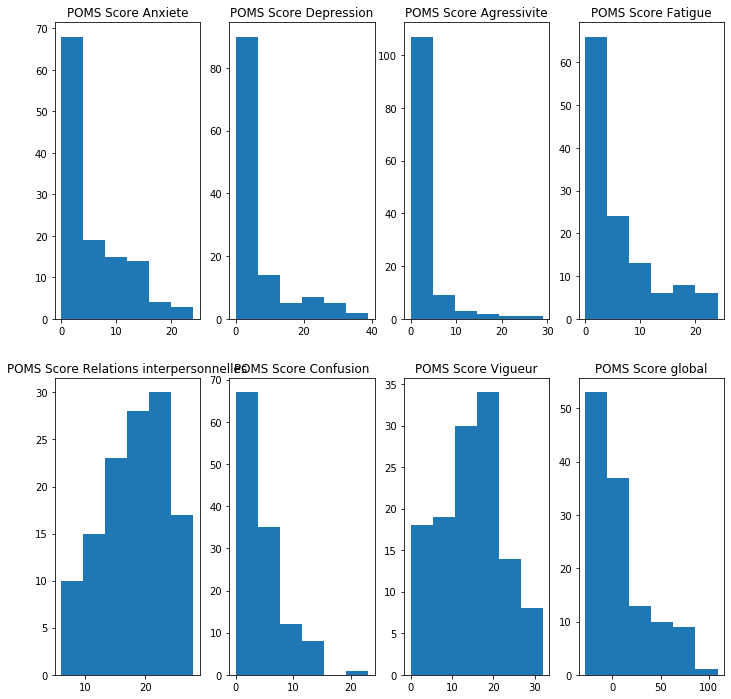

In [16]:
fig3 = plt.figure(figsize=(12,12))
ax12 = fig3.add_subplot(2,4,1)
ax22 = fig3.add_subplot(2,4,2)
ax32 = fig3.add_subplot(2,4,3)
ax42 = fig3.add_subplot(2,4,4)
ax52 = fig3.add_subplot(2,4,5)
ax62 = fig3.add_subplot(2,4,6)
ax72 = fig3.add_subplot(2,4,7)
ax82 = fig3.add_subplot(2,4,8)
ax12.title.set_text('POMS Score Anxiete')
ax22.title.set_text('POMS Score Depression')
ax32.title.set_text('POMS Score Agressivite')
ax42.title.set_text('POMS Score Fatigue')
ax52.title.set_text('POMS Score Relations interpersonnelles')
ax62.title.set_text('POMS Score Confusion')
ax72.title.set_text('POMS Score Vigueur')
ax82.title.set_text('POMS Score global')
ax12.hist(demo_net_spd.poms_score_tension,bins = 6)
ax22.hist(demo_net_spd.poms_score_depression,bins = 6)
ax32.hist(demo_net_spd.poms_score_anger,bins = 6)
ax42.hist(demo_net_spd.poms_score_fatigue,bins = 6)
ax52.hist(demo_net_spd.poms_score_friendliness,bins = 6)
ax62.hist(demo_net_spd.poms_score_confusion,bins = 6)
ax72.hist(demo_net_spd.poms_score_vigour,bins = 6)
ax82.hist(demo_net_spd.poms_score_tmd,bins = 6)
plt.show()

Pour les dimensions fatigue, tension, dépression, confusion, le score global et surtout l'agressivité, on observe qu'il y a une majorité d'individus ayant des scores peu élevés. Pour les dimensions vigueur et relations personnelles, les individus semblent plutôt avoir des scores moyens voire élevés.

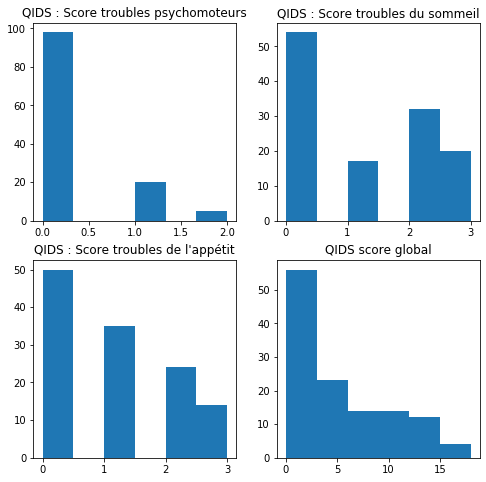

In [17]:
fig2 = plt.figure(figsize=(8,8))
ax10 = fig2.add_subplot(2,2,1)
ax20 = fig2.add_subplot(2,2,2)
ax30 = fig2.add_subplot(2,2,3)
ax40 = fig2.add_subplot(2,2,4)
ax10.title.set_text('QIDS : Score troubles psychomoteurs')
ax20.title.set_text('QIDS : Score troubles du sommeil')
ax30.title.set_text("QIDS : Score troubles de l'appétit")
ax40.title.set_text('QIDS score global')
ax10.hist(demo_net_spd.qids_psychomotor_score,bins = 6)
ax20.hist(demo_net_spd.qids_sleep_score,bins = 6)
ax30.hist(demo_net_spd.qids_appetite_score,bins = 6)
ax40.hist(demo_net_spd.qids_score,bins = 6)
plt.show()

La grande majorité de notre échantillon ne semble pas présenter de troubles psychomoteurs. Les troubles du sommeil et de l'appétit seraient quant à eux plus fréquents. La majorité des individus présente un faible score au QIDS.

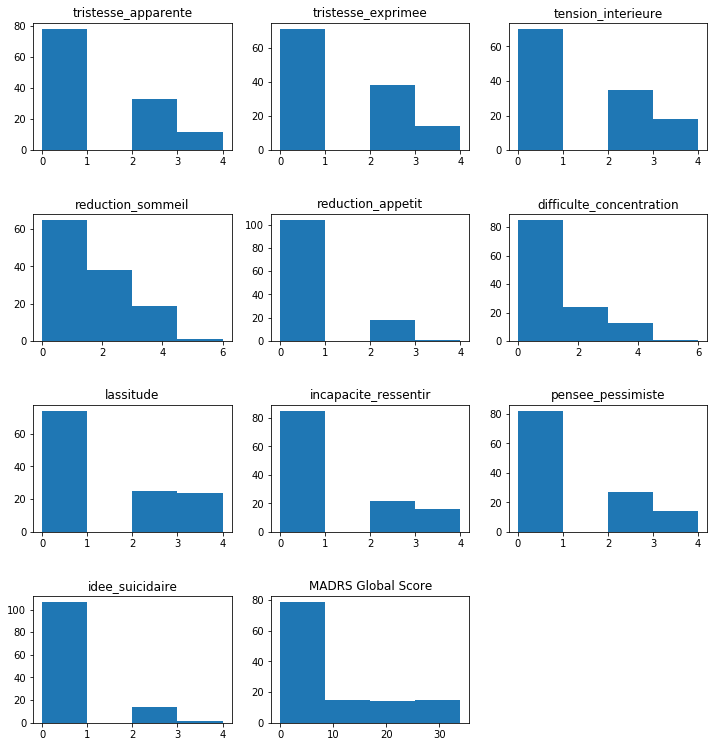

In [19]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(4,3,1)
ax2 = fig.add_subplot(4,3,2)
ax3 = fig.add_subplot(4,3,3)
ax4 = fig.add_subplot(4,3,4)
ax5 = fig.add_subplot(4,3,5)
ax6 = fig.add_subplot(4,3,6)
ax7 = fig.add_subplot(4,3,7)
ax8 = fig.add_subplot(4,3,8)
ax9 = fig.add_subplot(4,3,9)
ax10 = fig.add_subplot(4,3,10)
ax1.title.set_text('tristesse_apparente')
ax2.title.set_text('tristesse_exprimee')
ax3.title.set_text('tension_interieure')
ax4.title.set_text('reduction_sommeil')
ax5.title.set_text('reduction_appetit')
ax6.title.set_text('difficulte_concentration')
ax7.title.set_text('lassitude')
ax8.title.set_text('incapacite_ressentir')
ax9.title.set_text('pensee_pessimiste')
ax10.title.set_text('idee_suicidaire')
ax1.hist(demo_net_spd.tristesse_apparente,bins = 4)
ax2.hist(demo_net_spd.tristesse_exprimee,bins = 4)
ax3.hist(demo_net_spd.tension_interieure,bins = 4)
ax4.hist(demo_net_spd.reduction_sommeil,bins = 4)
ax5.hist(demo_net_spd.reduction_appetit,bins = 4)
ax6.hist(demo_net_spd.difficulte_concentration,bins = 4)
ax7.hist(demo_net_spd.lassitude,bins = 4)
ax8.hist(demo_net_spd.incapacite_ressentir,bins = 4)
ax9.hist(demo_net_spd.pensee_pessimiste,bins = 4)
ax10.hist(demo_net_spd.idee_suicidaire,bins = 4)
ax11 = fig.add_subplot(4,3,11)
ax11.title.set_text('MADRS Global Score')
ax11.hist(demo_net_spd.madrs_score, bins=4)
fig.subplots_adjust(left=0.12, bottom=0.11, right=0.90, top=0.92, wspace=0.2, hspace=0.5)
plt.show()

On remarque déjà que pour chacun des items (hormi difficulté de concentration), aucun individu n'a obtenu un score supérieur à 4 (les scores vont de 0 à 6 pour chaque item). Aussi, on observe encore une majorité d'individus présentant des scores peu élevés. Les autres individus ont obtenu des scores moyennement élevés globalement. 

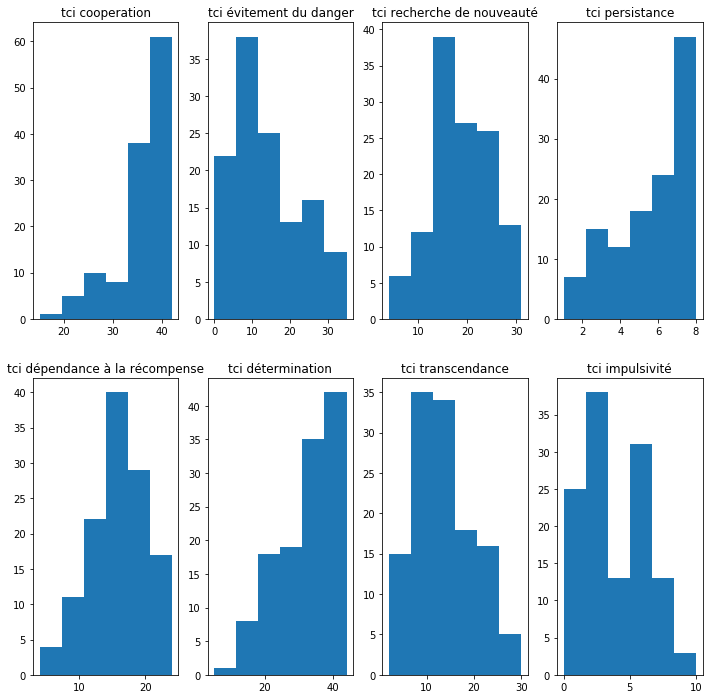

In [22]:

fag = plt.figure(figsize=(12,12))
az1 = fag.add_subplot(2,4,1)
az2 = fag.add_subplot(2,4,2)
az3 = fag.add_subplot(2,4,3)
az4 = fag.add_subplot(2,4,4)
az5 = fag.add_subplot(2,4,5)
az6 = fag.add_subplot(2,4,6)
az7 = fag.add_subplot(2,4,7)
az8 = fag.add_subplot(2,4,8)
az1.title.set_text('tci cooperation')
az2.title.set_text('tci évitement du danger')
az3.title.set_text('tci recherche de nouveauté')
az4.title.set_text('tci persistance')
az5.title.set_text('tci dépendance à la récompense')
az6.title.set_text('tci détermination')
az7.title.set_text('tci transcendance')
az8.title.set_text('tci impulsivité')
az1.hist(demo_net_spd.tci_coop_score,bins = 6)
az2.hist(demo_net_spd.tci_harmavoid_score,bins = 6)
az3.hist(demo_net_spd.tci_noveltyseek_score,bins = 6)
az4.hist(demo_net_spd.tci_persistence_score,bins = 6)
az5.hist(demo_net_spd.tci_rewarddep_score,bins = 6)
az6.hist(demo_net_spd.tci_selfdirect_score,bins = 6)
az7.hist(demo_net_spd.tci_selftranscend_score,bins = 6)
az8.hist(demo_net_spd.tci_impulsivity_score,bins = 6)
plt.show()


Les effectifs augmentent considérablement avec les scores aux dimensions coopération, persistance et la détermination. Ainsi, notre échantillon a globalement des scores élevés à ces échelles. Pour la dépendance à la récompense, il y aurait plus d'individus ayant des scores élevés. On observe plus d'individus ayant des scores peu élevés à l'évitement du danger  et à la transcendance que d'individus ayant des scores élevés. On observe le même phénomène mais de manière moins importante pour le score à l'impulsivité. On ne remarque pas de différence notable pour la recherche de la nouveauté. 

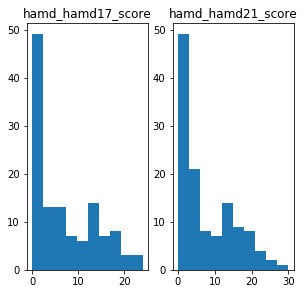

In [25]:
fog = plt.figure(figsize=(10,10))
az11 = fog.add_subplot(2,4,1)
az12 = fog.add_subplot(2,4,2)
az11.title.set_text('hamd_hamd17_score')
az12.title.set_text('hamd_hamd21_score')
az11.hist(demo_net_spd.hamd_hamd17_score,bins = 10)
az12.hist(demo_net_spd.hamd_hamd21_score,bins = 10)

plt.show()

Aucun individu n'a un score excédant 23 au HAMD17, ce qui impliquerait que les individus de l'échantillon souffriraient au plus d'une dépression modérée (pour cette échelle, on considère qu'un score supérieur à  24 dénote une dépression sévère). On observerait la présence d'une dépression à partir d'un score supérieur à 8, ainsi la majorité des individus semble ne pas souffrir de dépression. 

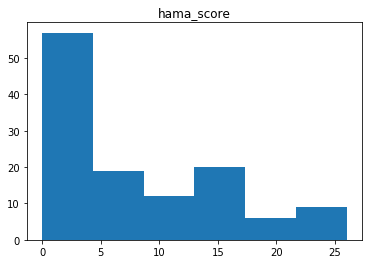

In [26]:
plt.hist(demo_net_spd.hama_score,bins = 6)
plt.title("hama_score")
plt.show()



Les scores de cette échelle sont compris entre 0 et 52. On considère qu'un score compris entre 18 et 24 dénote une anxiété légère à modérée, et un score supérieur à 25 dénote une anxiété modérée à sévère. Dans notre échantillon, les scores s'élèvent au plus à 26. On peut donc supposer qu'il n'y a pas d'individu souffrant d'anxiété sévère. Bien que la majorité des individus semble ne pas souffrir d'anxiété, on observe toutefois une quantitué non négligeable d'individus soufrant d'anxiété légère à modérée. 

In [27]:
#some statistics


print(demo_net_spd.describe(include='all'))

       batch         age     sex Diag      hs_CRP  shaps_score  psqi_score  \
count    123  123.000000     123  123  123.000000   123.000000  123.000000   
unique     4         NaN       2    2         NaN          NaN         NaN   
top      2nd         NaN  Female   HC         NaN          NaN         NaN   
freq      33         NaN      67   74         NaN          NaN         NaN   
mean     NaN   32.373984     NaN  NaN    3.025935    22.845528    6.894309   
std      NaN   10.812408     NaN  NaN    4.654423     7.220227    3.819306   
min      NaN   18.000000     NaN  NaN    0.000000    14.000000    0.000000   
25%      NaN   24.000000     NaN  NaN    0.500000    16.000000    4.000000   
50%      NaN   28.000000     NaN  NaN    1.300000    23.000000    6.000000   
75%      NaN   43.000000     NaN  NaN    3.350000    28.000000    9.000000   
max      NaN   55.000000     NaN  NaN   31.500000    42.000000   17.000000   

        ctq_denial_score  ctq_emoabuse_score  ctq_emoneglect_sc

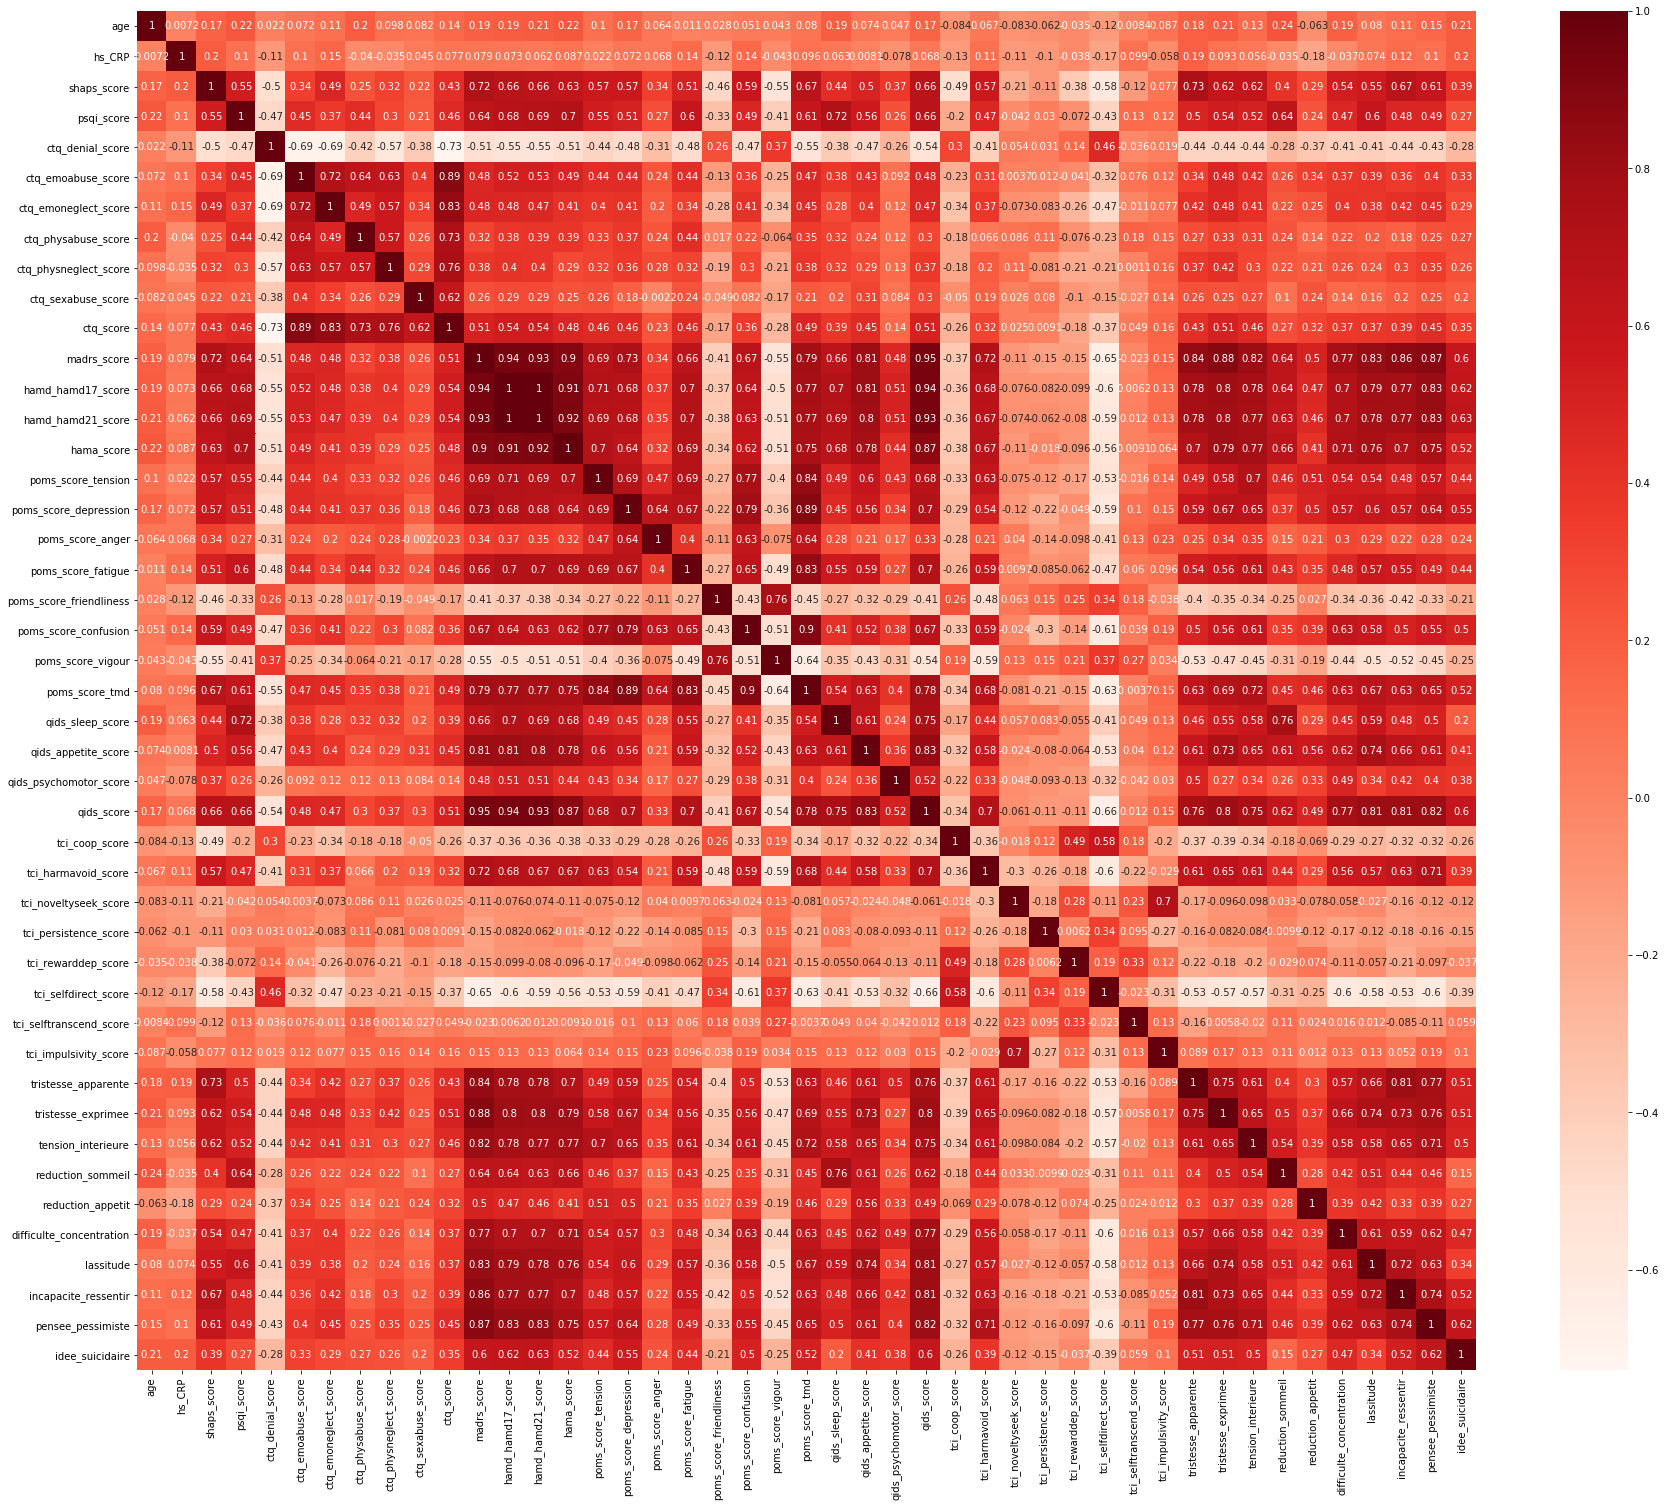

In [44]:
# matrice de corrélation
plt.figure(figsize=(30,25))
cor = demo_net_spd.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
#Correlation with output variable
cor_target = abs(cor["lassitude"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score             0.829601
hamd_hamd17_score       0.788778
hamd_hamd21_score       0.783143
hama_score              0.761286
qids_appetite_score     0.744594
qids_score              0.806249
tristesse_exprimee      0.738669
lassitude               1.000000
incapacite_ressentir    0.718104
Name: lassitude, dtype: float64

In [76]:
#Correlation with output variable
cor_target = abs(cor["incapacite_ressentir"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score             0.859885
hamd_hamd17_score       0.774503
hamd_hamd21_score       0.773408
hama_score              0.704748
qids_score              0.811192
tristesse_apparente     0.805593
tristesse_exprimee      0.728753
lassitude               0.718104
incapacite_ressentir    1.000000
pensee_pessimiste       0.743616
Name: incapacite_ressentir, dtype: float64

Les items "incapacité à ressentir" et "lassitude" du MADRS sont corrélés entre-eux et avec les autres items "tristesse apparente", "tristesse exprimée", "pensées pessimistes" du MADRS ainsi qu'au score global de cette échelle. Aussi,il existe une corrélation relativement élevée avec les scores observés aux autres échelles mesurant la sévérité de la dépression (notamment le QIDS), comme on pouvait s'y attendre. 
Cependant, je pensais observer une corrélation avec le SHAPS qui mesure l'anhédonie, ce qui n'est le cas pour aucun de ces deux items. 

In [45]:
#Correlation with output variable
cor_target = abs(cor["qids_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score                 0.945975
hamd_hamd17_score           0.936099
hamd_hamd21_score           0.933625
hama_score                  0.871623
poms_score_depression       0.700413
poms_score_tmd              0.777933
qids_sleep_score            0.746338
qids_appetite_score         0.831769
qids_score                  1.000000
tci_harmavoid_score         0.703901
tristesse_apparente         0.758791
tristesse_exprimee          0.799743
tension_interieure          0.746232
difficulte_concentration    0.773758
lassitude                   0.806249
incapacite_ressentir        0.811192
pensee_pessimiste           0.816728
Name: qids_score, dtype: float64

Le QIDS, qui mesure la sévérité de la dépression, est corrélé très fortement au MADRS (et 7 de ses 10 items)ainsi qu'au HAMD (qui mesurent tous deux également la sévérité de la dépression) comme on pouvait s'y attendre. 
Aussi, on observe un coefficient élevé entre le score à cette échelle et celui au HAMA, qui lui mesure l'anxiété éprouvée. 
Il est également corrélé aux scores appetit et sommeil qui sont des dimensions de ce test. En revanche, on n'observe pas de corrélation significative entre le score troubles psychomoteurs et le score global.
Enfin, on peut relever une corrélation relativement significative avec la dimension dépression du POMS ainsi qu'une corrélation plus élevée avec le score global de détresse psychologique du POMS.

In [73]:
#Correlation with output variable
cor_target = abs(cor["qids_appetite_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score            0.812241
hamd_hamd17_score      0.808270
hamd_hamd21_score      0.797438
hama_score             0.779738
qids_appetite_score    1.000000
qids_score             0.831769
tristesse_exprimee     0.732607
lassitude              0.744594
Name: qids_appetite_score, dtype: float64

On remarque qu'il n'y a pas de corrélation significative entre le score appetit du QIDS et l'item troubles de l'appetit du MADRS. En revanche, il y a une corrélation entre ce premier et les items "tristesse exprimée" ainsi que "lassitude" du MADRS. Aussi, son score est corrélé fortement aux score globaux des échelles mesurant la sévérité de la dépression.

In [46]:
#Correlation with output variable
cor_target = abs(cor["ctq_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

ctq_denial_score         0.727377
ctq_emoabuse_score       0.891627
ctq_emoneglect_score     0.832317
ctq_physabuse_score      0.732033
ctq_physneglect_score    0.756651
ctq_score                1.000000
Name: ctq_score, dtype: float64

Il n'existe pas de corrélation entre les scores aux différents abus ou négligences du CTQ et les échelles mesurant la sévérité de la dépression. 
Aussi, il n'y a aucune corrélation entre ces scores et les différents scores du POMS relatifs aux états d'humeur, de même avec les scores aux différents tempéraments et traits de caractère mesurés par le TCI.

In [47]:
#Correlation with output variable
cor_target = abs(cor["madrs_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

shaps_score                 0.716578
madrs_score                 1.000000
hamd_hamd17_score           0.941164
hamd_hamd21_score           0.934839
hama_score                  0.895256
poms_score_depression       0.734512
poms_score_tmd              0.787059
qids_appetite_score         0.812241
qids_score                  0.945975
tci_harmavoid_score         0.721845
tristesse_apparente         0.841413
tristesse_exprimee          0.879251
tension_interieure          0.815577
difficulte_concentration    0.774451
lassitude                   0.829601
incapacite_ressentir        0.859885
pensee_pessimiste           0.873170
Name: madrs_score, dtype: float64

Le MADRS a de fortes corrélations avec les autres échelles mesurant la sévérité de la dépression (notamment le HAMD17 avec lequel il y a une corrélation de .94), le HAMA mesurant l'anxiété, la dimension dépression du POMS ainsi que le score global de détresse psychologique de ce dernier. Aussi, il est corrélé fortement à 7 de ses 10items.
On peut aussi noter la corrélation relativement significative entre le score au MADRS et le tempérament "évitement du danger" du TCI. 

In [48]:
#Correlation with output variable
cor_target = abs(cor["hama_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score                 0.895256
hamd_hamd17_score           0.910783
hamd_hamd21_score           0.917128
hama_score                  1.000000
poms_score_tension          0.701676
poms_score_tmd              0.745702
qids_appetite_score         0.779738
qids_score                  0.871623
tristesse_exprimee          0.792782
tension_interieure          0.771054
difficulte_concentration    0.711029
lassitude                   0.761286
incapacite_ressentir        0.704748
pensee_pessimiste           0.746890
Name: hama_score, dtype: float64

Le HAMA possède de fortes corrélations avec nombre de variables.
D'abord, on remarque des coefficients de corrélation supérieurs à 0.9 avec le HAMD, et presque autant avec le MADRS et le QIDS. On peut alors se demander s'il existe une forte corrélation entre l'anxiété et la présence d'un épisode dépressif, ou si le HAMA n'est pas assez spécifique quant à l'anxiété et mesurerait plutôt la sévérité de la dépression. 
Par ailleurs, il existe une corrélation entre le score au HAMA et la dimension tension/anxiété du POMS (r=0.7) ainsi qu'avec l'item tension intérieure du MADRS (r=0.77). 
On observe également des corrélations relativement élevée avec plusieurs items du MADRS (notamment tristesse exprimée et lassitude) ainsi qu'avec la dimention "troubles de l'appétit" du QIDS. 

In [53]:
#Correlation with output variable
cor_target = abs(cor["hamd_hamd17_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score             0.941164
hamd_hamd17_score       1.000000
hamd_hamd21_score       0.995212
hama_score              0.910783
poms_score_tension      0.706296
poms_score_fatigue      0.701245
poms_score_tmd          0.771312
qids_sleep_score        0.701850
qids_appetite_score     0.808270
qids_score              0.936099
tristesse_apparente     0.779220
tristesse_exprimee      0.802403
tension_interieure      0.783257
lassitude               0.788778
incapacite_ressentir    0.774503
pensee_pessimiste       0.830076
Name: hamd_hamd17_score, dtype: float64

La corrélation entre le HAMD 17 et le HAMD 21 est presque égale à 1, ce qui est normal étant donné que le HAMD 21 est le HAMD17 avec 4 items supplémentaires permettant d'identifier le type de dépression. 
On remarque, en plus des corrélations avec le HAMA, le QIDS et le MADRS, une corrélation relativement élevée avec le POMS score global de détresse psychologique, ainsi qu'avec ses dimensions fatigue et tension. Aussi, le score appetit du QIDS est fortement corrélé au score du HAMD. 

In [54]:
#Correlation with output variable
cor_target = abs(cor["poms_score_depression"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score              0.734512
poms_score_depression    1.000000
poms_score_confusion     0.792008
poms_score_tmd           0.886589
qids_score               0.700413
Name: poms_score_depression, dtype: float64

Bien que le score dépression du POMS soit corrélé aux scores du QIDS et du MADRS (bien que ces corrélations ne soient pas très élevées), la corrélation entre cette dimension et les échelles HAMA et HAMD semblent ne pas être significatives.

In [80]:
#Correlation with output variable
cor_target = abs(cor["poms_score_vigour"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

poms_score_friendliness    0.755525
poms_score_vigour          1.000000
Name: poms_score_vigour, dtype: float64

Contrairement à mes attentes, on n'observe pas de corrélation significative entre le score à la dimension "vigueur" du POMS et la dimension "fatigue" du même test, ni avec le score au PSQI (qui mesure les troubles du sommeil) ou la dimension sommeil du QIDS. 
De même, il n'y a pas de corrélation significative entre la vigueur et la sévérité de la dépression mesurée par les différentes échelles utilisées.
En revanche, il existe une corrélation entre les relations interpersonnelles du POMS et cette dimension.

In [56]:
#Correlation with output variable
cor_target = abs(cor["poms_score_tmd"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score              0.787059
hamd_hamd17_score        0.771312
hamd_hamd21_score        0.765961
hama_score               0.745702
poms_score_tension       0.836877
poms_score_depression    0.886589
poms_score_fatigue       0.834074
poms_score_confusion     0.897832
poms_score_tmd           1.000000
qids_score               0.777933
tension_interieure       0.719309
Name: poms_score_tmd, dtype: float64

Comme on pouvait s'y attendre, il existe une corrélation entre le score global de détresse émotionnelle du POMS et les différentes échelles mesurant la sévérité de la dépression. Aussi, on observe une corrélation entre ce score et le score au HAMA. 

In [58]:
#Correlation with output variable
cor_target = abs(cor["poms_score_fatigue"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

hamd_hamd17_score     0.701245
hamd_hamd21_score     0.700237
poms_score_fatigue    1.000000
poms_score_tmd        0.834074
Name: poms_score_fatigue, dtype: float64

On n'observe pas de corrélation significative entre la dimension fatigue du POMS et l'item "réduction du sommeil" du MADRS, le PSQI ou encore le score sommeil du QIDS. 

In [60]:
#Correlation with output variable
cor_target = abs(cor["qids_sleep_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

psqi_score           0.715702
hamd_hamd17_score    0.701850
qids_sleep_score     1.000000
qids_score           0.746338
reduction_sommeil    0.758757
Name: qids_sleep_score, dtype: float64

En revanche, il existe une corrélation significative entre la dimension sommeil du QIDS et l'item "reduction du sommeil" du MADRS. 

In [61]:
#Correlation with output variable
cor_target = abs(cor["shaps_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

shaps_score            1.000000
madrs_score            0.716578
tristesse_apparente    0.734553
Name: shaps_score, dtype: float64

Bien que l'anhédonie soit un symptôme de la dépression, on n'observe pas de corrélation significative avec le HAMD et le QIDS. En revanche, on observe une corrélation significative avec le MADRS et son item "tristesse apparente". 

In [63]:
#Correlation with output variable
cor_target = abs(cor["poms_score_tension"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

hamd_hamd17_score       0.706296
hama_score              0.701676
poms_score_tension      1.000000
poms_score_confusion    0.767788
poms_score_tmd          0.836877
tension_interieure      0.700127
Name: poms_score_tension, dtype: float64

La dimension tension du POMS semble bien mesurer l'anxiété, puisqu'on observe une corrélation avec l'item "tension intérieure" et le HAMA. Toutefois, on n'observe pas de corrélation significative entre cette dimension et les échelles mesurant la sévérité de la dépression, hormi le HAMD.   

In [64]:
#Correlation with output variable
cor_target = abs(cor["tci_harmavoid_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

madrs_score            0.721845
qids_score             0.703901
tci_harmavoid_score    1.000000
pensee_pessimiste      0.707201
Name: tci_harmavoid_score, dtype: float64

Le tempérament "évitement du danger" est corrélé au MADRS et au QIDS, ce qui nous amène à penser que les individus ayant cette tendance pourraient constituer une population à risque pour la dépression. 

In [65]:
#Correlation with output variable
cor_target = abs(cor["tci_noveltyseek_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_noveltyseek_score    1.000000
tci_impulsivity_score    0.703563
Name: tci_noveltyseek_score, dtype: float64

In [66]:
#Correlation with output variable
cor_target = abs(cor["tci_coop_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_coop_score    1.0
Name: tci_coop_score, dtype: float64

In [67]:
#Correlation with output variable
cor_target = abs(cor["tci_persistence_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_persistence_score    1.0
Name: tci_persistence_score, dtype: float64

In [68]:
#Correlation with output variable
cor_target = abs(cor["tci_rewarddep_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_rewarddep_score    1.0
Name: tci_rewarddep_score, dtype: float64

In [69]:
#Correlation with output variable
cor_target = abs(cor["tci_selfdirect_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_selfdirect_score    1.0
Name: tci_selfdirect_score, dtype: float64

In [70]:
#Correlation with output variable
cor_target = abs(cor["tci_selftranscend_score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
relevant_features

tci_selftranscend_score    1.0
Name: tci_selftranscend_score, dtype: float64

Parmi les tempéraments et traits de caractère du TCI, seul le tempérament "évitement du danger" possède des corrélations avec d'autres variables (notamment deux échelles mesurant la sévérité de la dépression). 

In [84]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit

In [27]:
var_quanti = demo_net_spd.drop(['batch','sex'], 1)

print(var_quanti.info())

<class 'pandas.core.frame.DataFrame'>
Index: 123 entries, AA003 to AN965
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       123 non-null    float64
 1   Diag                      123 non-null    object 
 2   hs_CRP                    123 non-null    float64
 3   shaps_score               123 non-null    float64
 4   psqi_score                123 non-null    float64
 5   ctq_denial_score          123 non-null    float64
 6   ctq_emoabuse_score        123 non-null    float64
 7   ctq_emoneglect_score      123 non-null    float64
 8   ctq_physabuse_score       123 non-null    float64
 9   ctq_physneglect_score     123 non-null    float64
 10  ctq_sexabuse_score        123 non-null    float64
 11  ctq_score                 123 non-null    float64
 12  madrs_score               123 non-null    float64
 13  hamd_hamd17_score         123 non-null    float64
 14  hamd_hamd

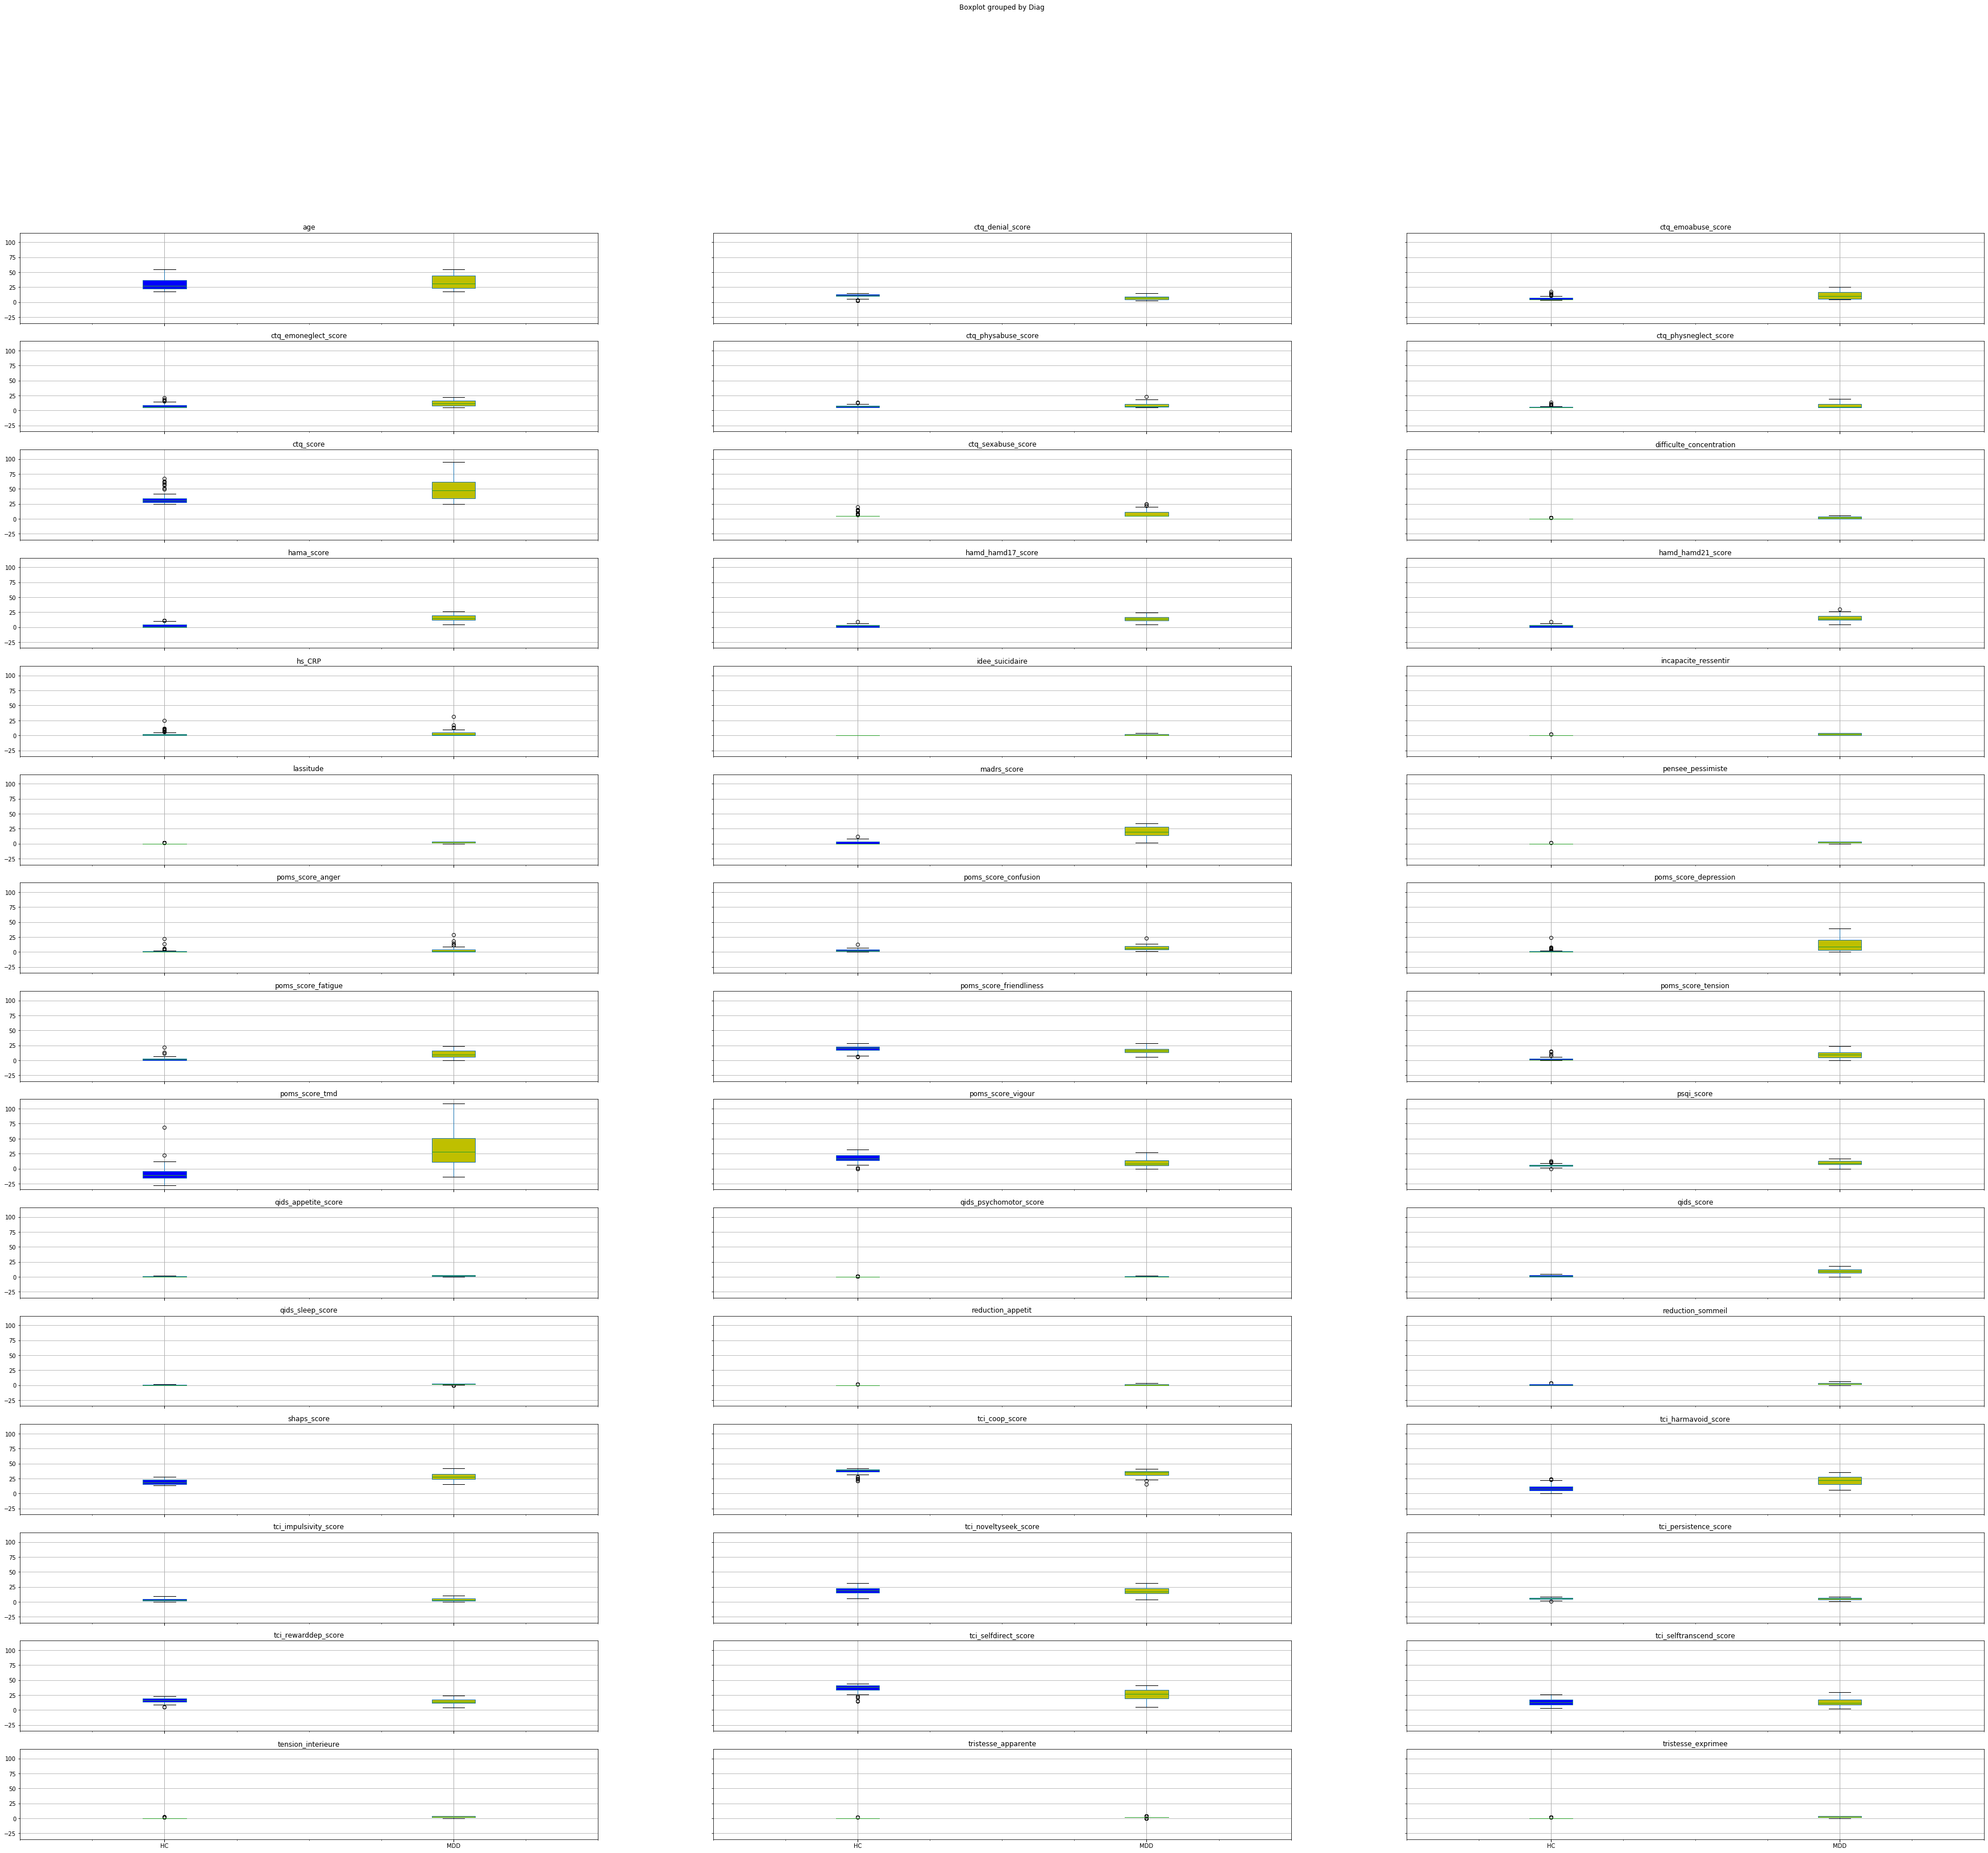

In [30]:
df = var_quanti
bp_dict = df.boxplot(
    by="Diag",layout=(20,3),figsize=(60,70),
    return_type='both',
    patch_artist = True,
)

colors = ['b', 'y', 'm', 'c', 'g', 'b', 'r', 'k', ]
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_xlabel('')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

plt.show()

Les boîtes à moustaches nous renseignent sur les scores de l'échantillon aux différentes échelles selon que les individus souffrent de dépression ou non. 

D'abord, la population saine semble être légèrement moins âgée que celle des individus qui souffrent de dépression. 

Le mécanisme de défense déni -- protègeant le psychisme -- semble être plus présent chez le groupe sain que le groupe dépressif. Effectivement, on remarque des scores légèrement plus élevés au sein du groupe contrôle à l'échelle du CTQ mesurant le déni/la minimisation des traumatismes subis durant l'enfance. 
On observe également des scores globalement plus élevés chez les individus dépressifs que les individus sains aux dimensions abus émotionnels, sexuels ainsi que négligences émotionnelles et physiques du CTQ. La différence est d'ailleurs plus visible sur la boîte à moustache du score global du CTQ. 

On observe également une différence de scores bien visible entre les groupes sains et dépressifs pour le HAMA, le HAMD, le MADRS, le POMS tmd et le QIDS. 

A la  dimension confusion et plus particulièrement aux dimensions fatigue et tension du POMS, les individus souffrant de dépression semblent avoir des scores plus élevés que les individus du groupe contrôle. En revanche, leurs scores sont moins élevés à la dimension vigueur que ceux du groupe sain. 

On observe aussi au SHAPS des scores plus élevés pour le groupe dépression. 

Enfin, il semblerait que les individus du groupe contrôle aient des scores légèrement plus élevés aux échelles mesurant la détermination et la coopération que le groupe dépression. En revanche, on observe une différence nette de scores selon le diagnostic pour le tempérament évitement du danger. Il se pourrait donc que les individus ayant une propension à éviter le danger soient plus susceptibles de souffrir de dépression au cours de leur vie. 


MODELE DE PREDICTION


Sélection de variables / PCA


Etapes de réalisation de PCA :

sélectionner les variables actives : les variables pour lesquelles on veut expliquer les relations - à projeter sur le plan orthogonal - idéal : même unité de mesure
centrer. réduire?
réaliser l'ACP
choisir le nombre de dimensions à interpréter : vérifier le nombre de dimensions expliquant la variance, vérifier si la variance expliquée par les axes est suffisante au regard de n ind et p var
analyser les résultats de l'ajustement du nuage de points : projection des variables et barycentre des individus qui prennent les modalités d'une variable qualitative
utiliser les indicateurs pour enrichir l'interprétation
revenir aux données brutes pour interpréter

pour réaliser une PCA, il faut un rapport de 3 entre n individus et p variables.


In [145]:
n = demo_net_spd.shape[0]
p = demo_net_spd.shape[1]
print("le nombre de variables pour l'acp doit être de : " + str(123/3) + " or nous avons " + str(p)+ " variables")

le nombre de variables pour l'acp doit être de : 41.0 or nous avons 48 variables


In [146]:
print(demo_net_spd.columns)

Index(['batch', 'age', 'sex', 'Diag', 'hs_CRP', 'shaps_score', 'psqi_score',
       'ctq_denial_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score',
       'ctq_physabuse_score', 'ctq_physneglect_score', 'ctq_sexabuse_score',
       'ctq_score', 'madrs_score', 'hamd_hamd17_score', 'hamd_hamd21_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score', 'tristesse_apparente', 'tristesse_exprimee',
       'tension_interieure', 'reduction_sommeil', 'reduction_appetit',
       'difficulte_concentration', 'lassitude', 'incapacit


Nous cherchons à maximiser la variance expliquée par 2 axes. Nous avons choisi de créer plusieurs ACP à partir des critères suivants :
- un ACP avec les variables relatives aux scores mesurant l'état psychologique (dépression) et émotionnel : soient les variables shaps, psqi, hamd17, hama, qids, madrs et poms (17 variables)
- un ACP avec les variables relatives aux scores mesurant le tempérament et le caractère : soient les variables tci (8 variables)
- un ACP avec les variables relatives aux scores mesurant les abus et négligences infantiles vécues : soient les variables ctq (7 variables)
Pour l'ACP 1 : 17 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables indépendantes, nous devons avoir une inertie à 21% minimum avec le première axe

Pour l'ACP 2 : 8 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables indépendantes, nous devons avoir une inertie à 36.3% minimum avec le première axe

Pour l'ACP 3 : 8 variables, 123 individus 
selon la table des Quantiles à 95 % du pourcentage d’inertie des 2 premières dimensions de 10000 PCA obtenue avec des variables indépendantes, nous devons avoir une inertie à 40% minimum avec le première axe


on va supprimer les variables qualitatives et sex et age et hs_CRP afin de les comparer aux axes


1ère PCA

In [68]:
#sous-ensemble des scores de madrs, shaps, psqi, qids, hamd, hama, et poms

X = demo_net_spd[['shaps_score', 'psqi_score','madrs_score', 'hamd_hamd17_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score']]


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables")

#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES REDUITES")
print(Z)



123 observations et 17 variables
VALEURS CENTREES REDUITES
[[ 0.2996143  -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 [-0.95198204 -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 [-1.23011457 -0.49801107 -0.86814258 ... -0.9886444  -0.47316022
  -0.96068874]
 ...
 [ 0.57774682  0.29068457  0.5021063  ...  0.95700777 -0.47316022
   0.68048786]
 [ 2.66374073  0.29068457  1.28510565 ...  0.95700777 -0.47316022
   0.27019371]
 [ 2.38560821  0.02778603  1.67660533 ...  0.95700777 -0.47316022
   1.29592908]]


Vérification des moyennes et écarts-types centrés réduits

In [69]:
#moyenne
print(np.mean(Z,axis=0))

print('\n')

#écart-type
print(np.std(Z,axis=0,ddof=0))

[ 2.27460327e-16 -1.94063374e-17  6.13781835e-17 -9.02620345e-18
 -2.12115781e-17  1.80524069e-18 -2.52733697e-17 -1.62471662e-17
 -7.04043869e-17 -3.38482629e-17  0.00000000e+00 -9.02620345e-17
  2.16628883e-17  8.71028633e-17 -9.20672752e-17  6.13781835e-17
  1.44419255e-17]


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Nous avons bien des moyennes égales à 0 (à 10^-16 près) et des écarts-types à 1. Nous avons bien centré réduit nos données. On peut commencer à réaliser l'ACP

In [70]:
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


On calcule les coordonnées factorielles que  nous  collectons  dans  la  variable coord

In [71]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_)

17


On a bien généré 17 composantes factorielles (égal à p)

In [72]:
#valeur variance/valeur propre corrigée associée aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[1.02524015e+01 1.51476231e+00 1.31184722e+00 8.86227317e-01
 5.77473095e-01 5.03588107e-01 4.59213977e-01 3.19035679e-01
 2.63474875e-01 2.34208340e-01 2.01500841e-01 1.69696708e-01
 1.42318940e-01 8.82798939e-02 4.58664272e-02 3.01047275e-02
 1.96335217e-32]


Nous venons de calculer les variances corrigées associées aux axes factoriels. Au vu des valeurs des variances, le premier axe semble contenir significativement plus d'informations que les autres. Regardons maintenant la proportion de ces variances en fonction des axes pour avoir une meilleure idée

In [73]:
#proportion de variance expliquée - axes
print(acp.explained_variance_ratio_)

[6.03082444e-01 8.91036653e-02 7.71674834e-02 5.21310187e-02
 3.39690056e-02 2.96228298e-02 2.70125869e-02 1.87668046e-02
 1.54985221e-02 1.37769611e-02 1.18529907e-02 9.98215932e-03
 8.37170236e-03 5.19293493e-03 2.69802513e-03 1.77086632e-03
 1.15491304e-33]


On voit que la première composante accapare 60.31% de l’information disponible. Aussi, nous  disposons  de 69.22%  avec  les  deux  premiers facteurs. Nous disposons des éléments permettant de construire le graphique ‘’Scree plot’’ (éboulis des valeurs propres)

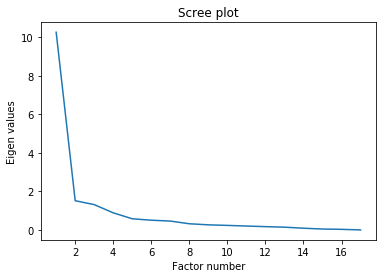

In [74]:
#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

Les valeurs propres sont supérieures à 1 jusqu'au 3ème facteur. Selon le critère du coude, le décrochement
se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente un
éventuel intérêt.

In [75]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
pd.DataFrame({'Val.Propre':eigval,'Seuils':bs})

,Val.Propre,Seuils
0,1.025240e+01,3.439553
1,1.514762e+00,2.439553
2,1.311847e+00,1.939553
3,8.862273e-01,1.606219
4,5.774731e-01,1.356219
5,5.035881e-01,1.156219
6,4.592140e-01,0.989553
7,3.190357e-01,0.846695
8,2.634749e-01,0.721695
9,2.342083e-01,0.610584


La composante est validée si : la vp > seuil
si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des « bâtons brisés »
q = 0 soit 1, 1 seul facteur semble suffire dans cette étude

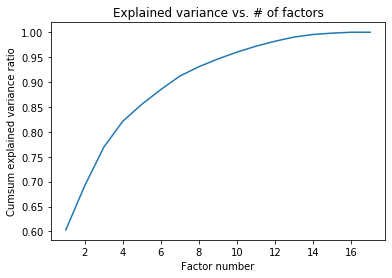

In [76]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


Hormi le premier facteur, les composantes prises individuellement ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre deux facteurs par commodité pour construire le plan de représentation du nuage de points.

Décision : Selon les lois du bâton brisé et du coude, un seul facteur suffit. Le premier facteur contient 60% de l'inertie. Cumulé au 2ème facteur, ils contiennent près de 70% de l'inertie. Nous allons donc néanmoins effectuer la représentation avec les deux axes.

Représentation des individus

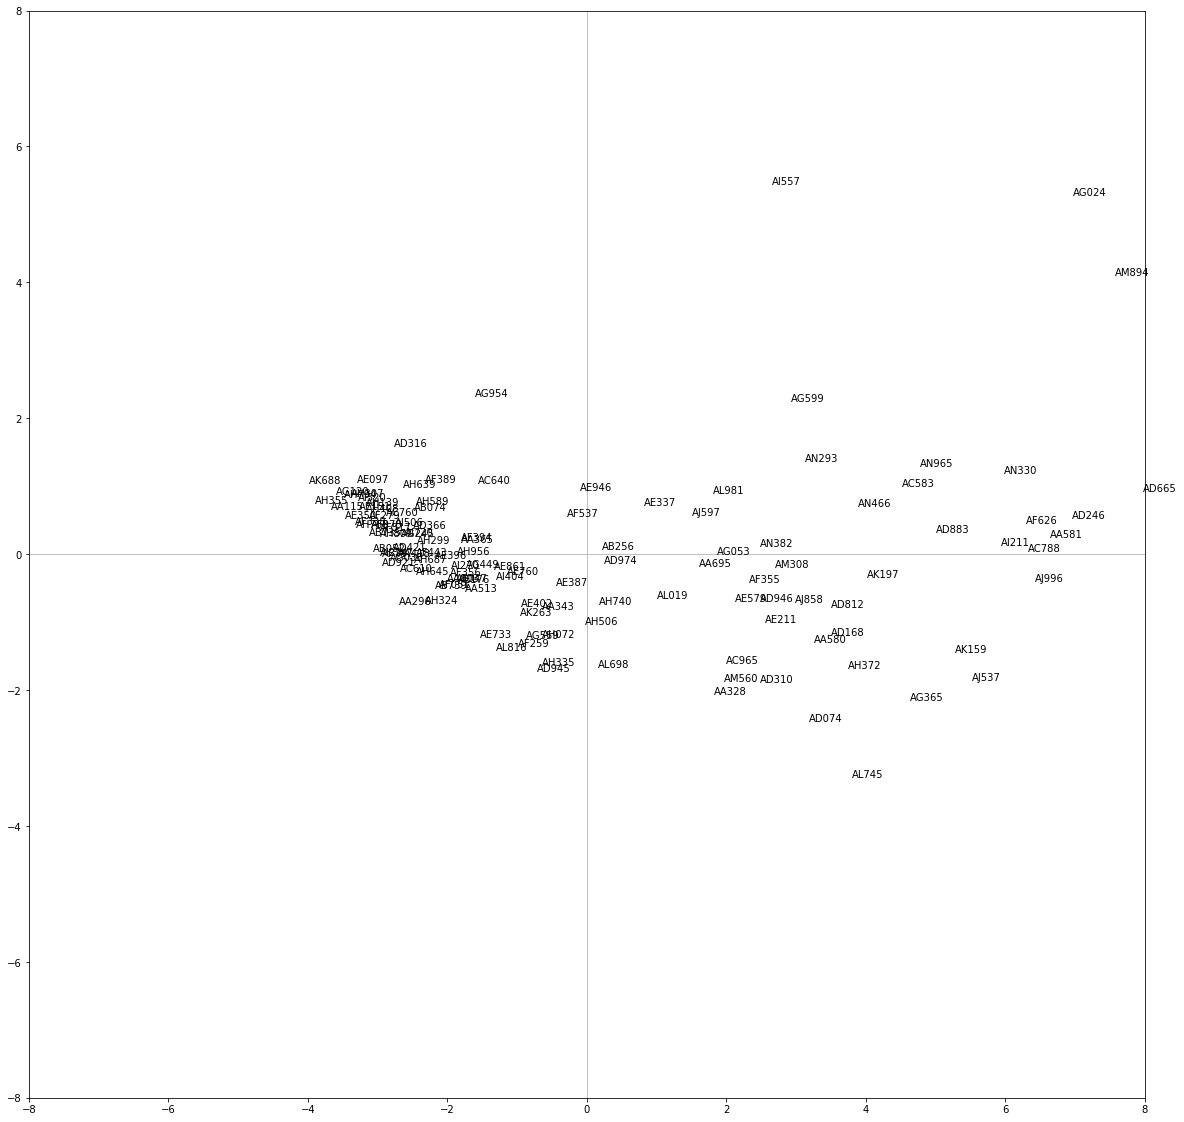

In [77]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(20,20))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-8,8) #et en ordonnée

#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


Un groupe d'individus est concentré entre le milieu du côté gauche du premier axe et le centre du 1er axe. Ce groupe parait donc homogène par rapport à certaines caractéristiques. Les individus AK688 et AE097 peuvent se ressembler. En dehors de ce groupe d'individus, le reste de la population est dispersée de part et d'autres à droite du 1er axe. Les individus AC788 et AI211 peuvent avoir des ressemblances. L'individu AD665 est opposé à l'individu AK688. Ces individus peuvent ne pas avoir de ressemblance. Nous observons trois individus isolés en haut à droite du second axe.  Il serait intéressant de vérifier le poids qu'ont ces individus sur cette représentation.

Pour  calculer  la  qualité  de représentation  des  individus  sur  les  axes,  nous  devons  d’abord  calculer  les carrés  des distances à  l’origine des  individus,  qui  correspondent également  à  leur  contribution  dans l’inertie totale

In [78]:
print("Qualité de représentation – Les COS² (cosinus carré).")

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)

print(pd.DataFrame({'ID':X.index,'d_i':di}))

Qualité de représentation – Les COS² (cosinus carré).
        ID        d_i
0    AA003   8.134634
1    AA115  15.070343
2    AA296  11.908476
3    AA328  15.602426
4    AA343   4.069687
5    AA365   8.085626
6    AA418   8.794168
7    AA513   4.764004
8    AA580  17.124729
9    AA581  52.275768
10   AA695  12.818724
11   AB052   9.887954
12   AB074  10.235718
13   AB256   8.491364
14   AB735  10.891121
15   AB739   8.916957
16   AC583  29.223643
17   AC610   9.545638
18   AC640   7.408059
19   AC760  10.621350
20   AC788  51.178195
21   AC965  15.051452
22   AD074  22.408495
23   AD168  18.261767
24   AD246  62.439706
25   AD310  16.235542
26   AD316  11.183789
27   AD366   8.170436
28   AD421   9.500545
29   AD665  68.229945
30   AD812  18.916491
31   AD883  31.106976
32   AD921   9.426987
33   AD945  15.669736
34   AD946  14.479989
35   AD974   2.666321
36   AE097  17.635384
37   AE151  12.570044
38   AE176   8.043420
39   AE211  16.300595
40   AE337  15.399510
41   AE350  13.056851


In [79]:
df = pd.DataFrame({'ID':X.index,'d_i':di})
df.sort_values(by = 'd_i',ascending = False)

,ID,d_i
65,AG024,87.829249
117,AM894,85.692007
29,AD665,68.229945
24,AD246,62.439706
62,AF626,57.977776
9,AA581,52.275768
20,AC788,51.178195
105,AJ996,47.413864
119,AN330,47.393384
100,AI557,41.753210


Les individus AG024, AM894 ou encore AD665 pèsent le plus pour la détermination des deux facteurs, on les retrouve par ailleurs aux extrémités de notre nuage de points. Ainsi, notre projection des individus sur le nuage de points semble représentative. 

Nous pouvons alors déduire la qualité de représentation des individus pour les deux facteurs en calculant les cos2 

In [80]:
#qualité de représentation des individus -COS2

cos2 = coord**2

for j in range(p):
    cos2[:,j] = cos2[:,j]/di

print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

        id    COS2_1        COS2_2
0    AA003  0.495591  2.022734e-02
1    AA115  0.892758  2.934425e-02
2    AA296  0.610888  4.550537e-02
3    AA328  0.213253  2.713018e-01
4    AA343  0.104634  1.650307e-01
5    AA365  0.403013  3.657012e-03
6    AA418  0.838797  8.657365e-05
7    AA513  0.640927  6.184330e-02
8    AA580  0.617881  9.785973e-02
9    AA581  0.844283  1.235322e-03
10   AA695  0.202129  2.367929e-03
11   AB052  0.949677  1.912490e-04
12   AB074  0.601646  3.993951e-02
13   AB256  0.005763  5.479146e-04
14   AB735  0.901257  6.726186e-03
15   AB739  0.535421  2.838020e-02
16   AC583  0.698606  3.437037e-02
17   AC610  0.756630  6.553866e-03
18   AC640  0.328871  1.479985e-01
19   AC760  0.783939  3.031773e-02
20   AC788  0.781777  2.743723e-05
21   AC965  0.264876  1.729571e-01
22   AD074  0.451333  2.698146e-01
23   AD168  0.670612  7.738301e-02
24   AD246  0.773678  4.477262e-03
25   AD310  0.378442  2.193241e-01
26   AD316  0.688274  2.242452e-01
27   AD366  0.761102

In [81]:
#proportion des individus ayant une bonne représentativité sur le plan (ayant somme des cos² supérieure à 0.7) 
ab = (cos2_sum.somme >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus a une bonne représentativité sur le plan (somme des cos² aux 2 axes supérieure à 0.7)")

#proportion des individus ayant une bonne représentativité sur l'axe 1 (supérieure à 0.7) 
ab = (cos2_sum.COS2_1 >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus a une bonne représentativité sur le 1er axe (cos² supérieur à 0.7)")

#proportion des individus ayant une corrélation avec l'axe 1 supérieure à 0.7 
ab = (cos2_sum.COS2_2 >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus est bien projeté sur le 2nd axe (cos² supérieur à 0.7) ")

58.5 % des individus a une bonne représentativité sur le plan (somme des cos² aux 2 axes supérieure à 0.7)
48.8 % des individus a une bonne représentativité sur le 1er axe (cos² supérieur à 0.7)
3.3 % des individus est bien projeté sur le 2nd axe (cos² supérieur à 0.7) 


In [82]:
print("On a notamment les individus " + str(list(cos2_sum[cos2_sum.COS2_1 >=0.7].id)[:3]) + " qui ont une bonne représentativité sur le 1er axe")
print(" et les individus " + str(list(cos2_sum[cos2_sum.COS2_2 >=0.7].id)[:3]) + " qui ont une bonne représentativité sur le 2eme axe")

On a notamment les individus ['AA003', 'AA115', 'AA296'] qui ont une bonne représentativité sur le 1er axe
 et les individus ['AC788', 'AE176', 'AH645'] qui ont une bonne représentativité sur le 2eme axe


In [83]:
#vérifions la théorie -somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


On a bien que pour chaque individu, la somme des cos2 de tous les facteurs est égale à 1. Regardons maintenant les contributions de chaque individu  aux  axes  (CTR). Elles   permettent  de   déterminer   les individus qui pèsent le plus dans la définition de chaque facteur

In [84]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

        id         CTR_1         CTR_2
0    AA003  3.196915e-03  8.831351e-04
1    AA115  1.066907e-02  2.373540e-03
2    AA296  5.768825e-03  2.908501e-03
3    AA328  2.638493e-03  2.271932e-02
4    AA343  3.376798e-04  3.604758e-03
5    AA365  2.584059e-03  1.587049e-04
6    AA418  5.849530e-03  4.086306e-06
7    AA513  2.421308e-03  1.581303e-03
8    AA580  8.390693e-03  8.994523e-03
9    AA581  3.499915e-02  3.466019e-04
10   AA695  2.054675e-03  1.629160e-04
11   AB052  7.446494e-03  1.014977e-05
12   AB074  4.883469e-03  2.194176e-03
13   AB256  3.880326e-05  2.497128e-05
14   AB735  7.783776e-03  3.931804e-04
15   AB739  3.786010e-03  1.358259e-03
16   AC583  1.618959e-02  5.390996e-03
17   AC610  5.727406e-03  3.357785e-04
18   AC640  1.931967e-03  5.884537e-03
19   AC760  6.602845e-03  1.728330e-03
20   AC788  3.172758e-02  7.536603e-06
21   AC965  3.161473e-03  1.397228e-02
22   AD074  8.020078e-03  3.245103e-02
23   AD168  9.711438e-03  7.584708e-03
24   AD246  3.830809e-02 

Trions maintenant la contribution pour l'axe 1 :

In [85]:
df = pd.DataFrame({'ID':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df.sort_values(by = 'CTR_1',ascending = False)

,ID,CTR_1,CTR_2
29,AD665,5.046609e-02,4.652981e-03
117,AM894,4.544295e-02,9.057216e-02
65,AG024,3.842589e-02,1.493097e-01
24,AD246,3.830809e-02,1.500458e-03
9,AA581,3.499915e-02,3.466019e-04
105,AJ996,3.273791e-02,8.591418e-04
20,AC788,3.172758e-02,7.536603e-06
62,AF626,3.147021e-02,1.114933e-03
119,AN330,2.837271e-02,7.572334e-03
94,AI211,2.796204e-02,9.209086e-05


Comme on pouvait s'y attendre, les individus se situant le plus à droite du plan contribuent le plus à l'axe 1

In [86]:
df = pd.DataFrame({'ID':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
df.sort_values(by = 'CTR_2',ascending = False)

,ID,CTR_1,CTR_2
100,AI557,5.593641e-03,1.589205e-01
65,AG024,3.842589e-02,1.493097e-01
117,AM894,4.544295e-02,9.057216e-02
112,AL745,1.142427e-02,5.788989e-02
22,AD074,8.020078e-03,3.245103e-02
74,AG954,2.063239e-03,2.907082e-02
73,AG599,6.804191e-03,2.699438e-02
70,AG365,1.704618e-02,2.474241e-02
3,AA328,2.638493e-03,2.271932e-02
25,AD310,4.872310e-03,1.911188e-02


On remarque sans surprise que les individus se situant le plus en haut du plan contribuent le plus à l'axe 2. On peut noter que les individus AG024 et AM894 contribuent fortement non seulement à l'axe 1, mais également à l'axe 2. 

Intéressons nous maintenant à la représentation des variables.

Nous  avons  besoin  des vecteurs propres pour l’analyse des variables. Ils sont fournis par le champ .components_

In [87]:
#Représentation des variables

#le champ components_ de l'objet ACP
print(acp.components_)
#les facteurs sont en ligne, les variables en colonne


[[ 2.34101640e-01  2.29769377e-01  2.89888609e-01  2.89157750e-01
   2.79469406e-01  2.55265310e-01  2.53582654e-01  1.54420646e-01
   2.50366592e-01 -1.52190089e-01  2.54997345e-01 -1.96339913e-01
   2.90732812e-01  2.21429870e-01  2.47419716e-01  1.57102533e-01
   2.90634963e-01]
 [-8.37871126e-02 -1.02902605e-01 -1.03395266e-01 -9.12462106e-02
  -1.01165380e-01  1.94809558e-01  3.39545205e-01  5.74299597e-01
   1.19605074e-01  3.82016845e-01  2.64110214e-01  3.58106404e-01
   1.98028143e-01 -1.23691324e-01 -1.57973719e-01 -1.30043177e-01
  -1.24337814e-01]
 [ 1.63101394e-01 -2.04692836e-01 -1.23940618e-01 -1.86569143e-01
  -2.00713464e-01  1.92317182e-02  4.90315907e-02  1.58523173e-01
  -2.79916603e-02 -5.40144120e-01  2.66534551e-01 -4.48095568e-01
   1.92053514e-01 -3.42631177e-01 -2.48928029e-01  7.27884857e-02
  -1.65004541e-01]
 [ 1.66867193e-03 -3.36466258e-01  1.07606268e-01  1.11949953e-01
   3.42657205e-02  9.65957866e-02  2.55411332e-02 -4.18555163e-02
  -2.20612864e-01  

Calculons les corrélations entre les variables et les axes, et affichons la matrice  des corrélations avec en ligne les variables et en colonne les facteurs :

In [88]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
#Les variables sont maintenant en ligne, les facteurs en colonne

[[ 7.49578739e-01 -1.03121559e-01  1.86809648e-01  1.57088187e-03
  -1.50115745e-01 -3.93119776e-01  4.20433391e-01  1.75634881e-02
  -1.45342743e-01 -6.86021006e-03 -1.21415730e-01  1.64180260e-02
  -2.81079436e-02 -3.61376720e-02  1.05728647e-02 -7.48716418e-03
  -1.39924409e-32]
 [ 7.35707107e-01 -1.26648081e-01 -2.34446780e-01 -3.16748148e-01
  -3.11533243e-01  1.76801585e-01  2.23241960e-01 -7.53151461e-02
   3.04906803e-01 -6.88158257e-02 -1.60328283e-02  4.78002453e-02
  -2.13807306e-02  5.23287480e-02 -1.17526539e-02 -5.28582296e-04
   2.60052590e-32]
 [ 9.28205107e-01 -1.27254427e-01 -1.41956501e-01  1.01300161e-01
   6.81844666e-02 -2.03147029e-01 -3.13861092e-02  4.21262054e-02
   3.31333277e-02  3.13908135e-02  9.19066924e-02 -5.45304880e-02
   4.44646169e-02  8.58279394e-02 -7.18669446e-02  1.23039289e-01
  -1.04544314e-32]
 [ 9.25864944e-01 -1.12301895e-01 -2.13688646e-01  1.05389291e-01
   1.15866359e-02 -7.95887310e-02 -4.80363029e-02  3.35398204e-02
  -2.42593976e-02 -

Concentrons nous sur les 2 premiers axes :

In [89]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CORRELATION AXE 1':corvar[:,0],'CORRELATION AXE 2':corvar[:,1]}))

                         id  CORRELATION AXE 1  CORRELATION AXE 2
0               shaps_score           0.749579          -0.103122
1                psqi_score           0.735707          -0.126648
2               madrs_score           0.928205          -0.127254
3         hamd_hamd17_score           0.925865          -0.112302
4                hama_score           0.894843          -0.124510
5        poms_score_tension           0.817343           0.239763
6     poms_score_depression           0.811956           0.417898
7          poms_score_anger           0.494445           0.706823
8        poms_score_fatigue           0.801658           0.147205
9   poms_score_friendliness          -0.487303           0.470170
10     poms_score_confusion           0.816485           0.325055
11        poms_score_vigour          -0.628668           0.440742
12           poms_score_tmd           0.930908           0.243724
13         qids_sleep_score           0.709005          -0.152234
14      qi

On remarque de très fortes corrélations à l'axe 1 notamment pour les échelles MADRS, HAMD, POMS TMD et QIDS. On peut préciser que ce sont des échelles mesurant la sévérité de la dépression, hormi le POMS qui évalue la détresse psychologique. On peut également notifier le HAMA qui possède une très forte corrélation à l'axe 1. Aussi, remarquons que les dimensions "relations interpersonnelles" et "vigueur" sont corrélées négativement avec l'axe 1. Pour l'axe 2, la dimension agressivité du POMS se distingue des autres variables avec une corrélation à 0.7. Les dimensions "relations interpersionnelles" et "vigueur" la suivent avec des corrélations moins élevés.

Réalisons maintenant le cercle des corrélations

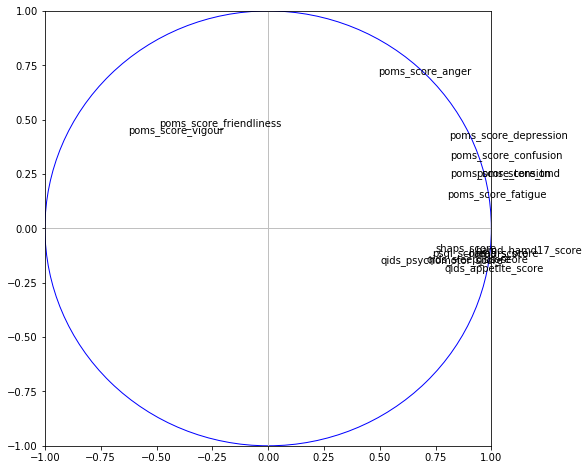

In [90]:

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


Les variables hamd, psqi, madrs, hama semblent fournir des informations plus ou moins similaires, étant donné qu'elles se superposent dans le plan. Les variables poms_score_tmd, qids_score, madrs_score, hamd_hamd17_score, hama_score, poms_score_tension, poms_score_confusion, poms_score_depression, poms_score_fatigue, qids_appetite_score, shaps_score, psqi_score, qids_sleep_score semblent semblent expliquer l'axe 1, puisqu'ils sont très fortement corrélés Cependant, les variables shaps_score, psqi_score, poms_score_fatigue, poms_score_friendliness, poms_score_vigour, qids_sleep_score, qids_appetite_score et qids_psychomotor_score sont mal représentées sur le plan. La dispertion des individus sur le plan peut donc être expliquée par poms_score_tmd, qids_score, madrs_score, hamd_hamd17_score, hama_score, poms_score_tension, poms_score_confusion et poms_score_depression. Ainsi, ces échelles mesurant la sévérité de la dépression, on peut supposer que l'axe 1 fournit les informations concernant la sévérité de la dépression. Les individus se trouvant à gauche du centre du plan devraient donc être les individus sains, tandis que ceux qui se trouvent à droite devraient souffrir d dépression. Aussi, plus leur dépression est sévère, plus ils devraient se situer à droite. Les individus sains étant fortement groupés au niveau de l'axe 1, les échelles sus-mentionnées ne semblent pas les distinguer entre eux. En revanche, on observe beaucoup plus de dispersion pour les individus à droite, donc de bonnes distinctions entre les individus qui souffrent de dépression. 
La variable poms_score_anger relative à l'agressivité est bien représentée sur le plan et explique à elle-seule l'axe 2 mais ne semble pas fournir d'informations quant à l'axe 1, que nous supposons être la sévérité de la dépression.

Calculons la qualité de la représentation des variables

In [91]:
#qualité de représentation des variables
print("Qualité de représentation des variables")

#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

Qualité de représentation des variables
                         id    COS2_1    COS2_2
0               shaps_score  0.561868  0.010634
1                psqi_score  0.541265  0.016040
2               madrs_score  0.861565  0.016194
3         hamd_hamd17_score  0.857226  0.012612
4                hama_score  0.800745  0.015503
5        poms_score_tension  0.668050  0.057486
6     poms_score_depression  0.659272  0.174638
7          poms_score_anger  0.244476  0.499599
8        poms_score_fatigue  0.642656  0.021669
9   poms_score_friendliness  0.237464  0.221060
10     poms_score_confusion  0.666649  0.105661
11        poms_score_vigour  0.395224  0.194253
12           poms_score_tmd  0.866590  0.059402
13         qids_sleep_score  0.502687  0.023175
14      qids_appetite_score  0.627616  0.037802
15   qids_psychomotor_score  0.253042  0.025616
16               qids_score  0.866007  0.023418


On remarque que les variables MADRS, HAMD, QIDS, HAMA, POMS agressivité, confusion, dépression et TMD ont une bonne représentativité sur le plan. Aussi, sur l'axe 1, les variables MADRS, HAMD, HAMA POMS tmd et QISQ ont une très bonne représentativité. Sur l'axe 2, la dimension agressivité a une bonne représentativité.

In [92]:
#vérifions la théorie
print("verifions la théorie cos2var")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne doit être égale à 1

verifions la théorie cos2var
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Regardons maintenant la contribution des variables aux axes

In [93]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

                         id     CTR_1     CTR_2
0               shaps_score  0.054804  0.007020
1                psqi_score  0.052794  0.010589
2               madrs_score  0.084035  0.010691
3         hamd_hamd17_score  0.083612  0.008326
4                hama_score  0.078103  0.010234
5        poms_score_tension  0.065160  0.037951
6     poms_score_depression  0.064304  0.115291
7          poms_score_anger  0.023846  0.329820
8        poms_score_fatigue  0.062683  0.014305
9   poms_score_friendliness  0.023162  0.145937
10     poms_score_confusion  0.065024  0.069754
11        poms_score_vigour  0.038549  0.128240
12           poms_score_tmd  0.084526  0.039215
13         qids_sleep_score  0.049031  0.015300
14      qids_appetite_score  0.061217  0.024956
15   qids_psychomotor_score  0.024681  0.016911
16               qids_score  0.084469  0.015460


Pour l'axe 1, aucune variable ne se dégage considérablement par rapport aux autres, bien que les variables madrs, hamd, qids et pomd tmd aient des contributions plus élevées que les autres variables. Les dimensions relations personnelles et agressivité du POMS et le score des troubles psychomoteurs sont les variables ayant le moins contribué à l'axe 1.Pour l'axe 2, conformément à ce que nous avons observé avant, la dimension agressivité du POMS ressort par rapport aux autres variables. 

In [94]:
print("vérifions la théorie ctrvar")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes doit être égale à 1

vérifions la théorie ctrvar
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


L'ACP fonctionne appliquée sur l'ensemble des variables quantititatives que nous avons choisies. La PCA fait une projection des variables suffisante au regard des scores obtenus concernant la qualité de représentation des variables (COS²var) et de la contribution des variables aux axes (CTRvar)
On sépare ce dataset en 2 sous-ensemble pour mieux lire les relations sur les projections des nuages de points

Ajoutons les variables illustratives quantitatives age, hs_CRP, ctq_score et les différents tempéraments et caractères du TCI à cette ACP

In [137]:
varsup = demo_net_spd[['hs_CRP', 'age','ctq_score','tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score']]

vsQuanti = varsup.values

print(vsQuanti)

#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))

for k in range(p):
    for j in range(varsup.shape[1]):
        corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]

#affichage des corrélations avec les axes
print(corSupp)

[[ 0.4 45.  30.  ... 35.   7.   6. ]
 [ 6.9 44.  25.  ... 41.  14.   1. ]
 [ 0.6 27.  26.  ... 40.   5.   3. ]
 ...
 [ 0.4 25.  75.  ... 41.   7.   1. ]
 [31.5 28.  51.  ... 23.  14.   2. ]
 [ 0.3 29.  31.  ... 15.   3.   2. ]]
[[ 1.00493501e-01  1.72620573e-02  7.08026713e-02 -1.54361253e-01
  -4.51986619e-02 -1.21500950e-01  1.19335159e-01  3.44633247e-02
  -3.70966389e-02 -5.54841921e-02 -2.90459124e-02 -2.17674227e-01
  -1.36052557e-01 -8.38487846e-02  1.61260469e-02  2.37886126e-02
  -9.59529571e-02]
 [ 1.52490784e-01  8.96673118e-03 -1.88743821e-01 -8.43148344e-03
  -1.73390582e-01 -1.45927012e-01  1.11704945e-01 -2.97754801e-02
   9.27373213e-02  7.89708648e-02  1.57486489e-01 -5.61877700e-02
   1.30691608e-01 -7.81025963e-02  2.51258499e-02 -7.85374581e-02
   6.91738958e-02]
 [ 5.33591144e-01  2.08068885e-02 -1.19058192e-01 -1.09116352e-01
   6.12789658e-02 -7.10475523e-02  9.76607328e-02 -7.69745740e-03
   3.17664211e-02 -3.47009781e-02 -1.94204087e-02  8.21025051e-03
   1.326

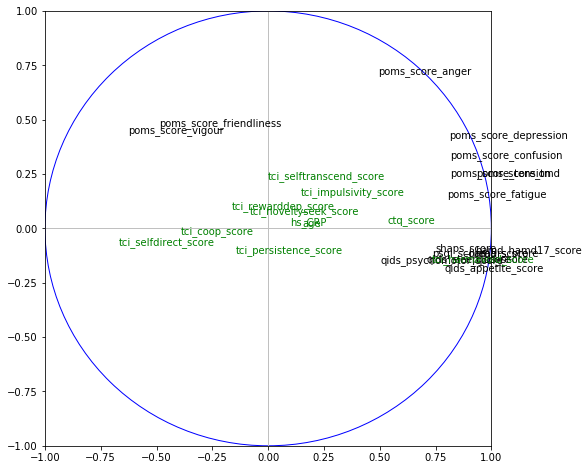

In [136]:
#cercle des corrélations avec les var. supplémentaires
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#variables actives

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#variables illustratives

for j in range(vsQuanti.shape[1]):
    plt.annotate(varsup.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
    

#ajouter les axes

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage


plt.show()

La plupart des variables supplémentaires se situent au centre du cercle. La variable tci_harmavoid_score, relative au tempérament de l'évitement du danger, a une corrélation supérieure à 0.7 avec le permier axe, qui est très bien expliqué par la variable relative au score de mesure de dépression poms_score. A l'inverse, la variable tci_selfdirect_score, relative au caractère déterminé, a une corrélation inférieure à -0.6 au premier axe. Il existe une relation inverse entre la détermination et la dépression

Ajoutons maintenant les variables qualitatives : d'abord le diagnostic puis le sexe

['HC' 'MDD']


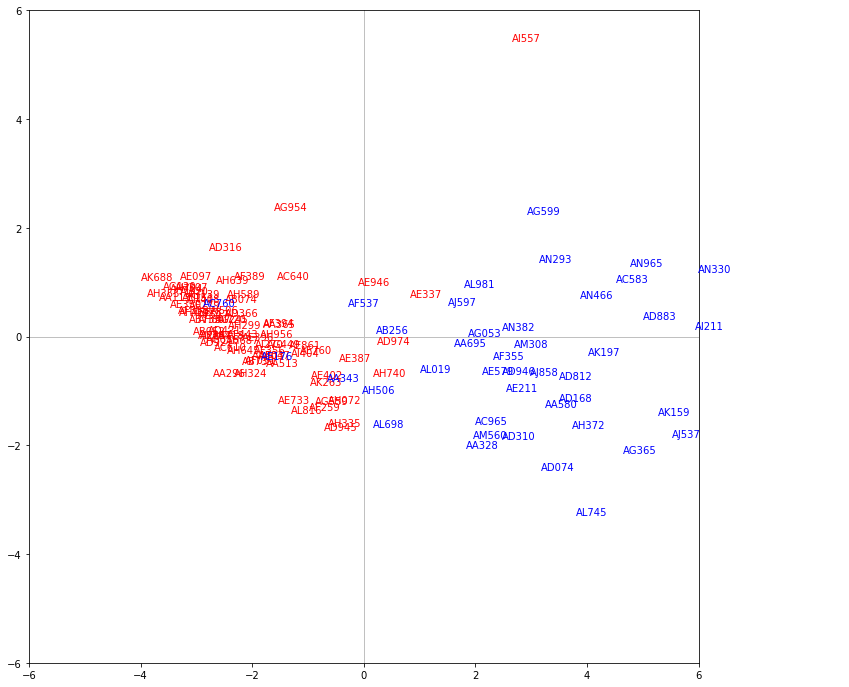

In [118]:
varsupquali = demo_net_spd[['Diag']]

#modalités de la variable qualitative

modalites = np.unique(varsupquali)
print(modalites)

#liste des couleurs

couleurs = ['r','b']

#faire un graphique en coloriant les points

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative

for c in range(len(modalites)):
    
    #numéro des individus concernés
    numero = np.where(varsupquali == modalites[c])
    
    #les passer en revue pour affichage
    
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

On voit une nette distinction entre les individus à gauche du plan et ceux à droite du plan. La couleur rouge représentant la modalité HC de Diag, soit l'absence de dépression, et la couleur droite la modalité "MDD" (dépression), il semble clair que l'axe 1 détermine bien la sévérité de la dépression, comme nous l'avions supposé plus tôt. On peut toutefois s'interroger sur la position de 4 individus en particulier : les individus AC760, AE176 et AA343, qui appartiennent au groupe MDD mais se trouvent à gauche du plan, et l'individu AI557 qui quant à lui se situe en haut à droite du plan, alors qu'il appartient au groupe HC. 
On peut supposer que les trois premiers individus sont en rémission partielle ou totale, d'où leur position dans le plan, et le dernier devrait avoir obtenu un fort score à la dimension anger du POMS, et est peut être un HC à risque. Vérifions cela.

In [139]:
demo_net_pd.PrimaryDiagnosis.loc['AC760']

'Major_Depressive_Disorder,_Single_Episode,_In_Partial_Remission'

In [140]:
demo_net_pd.PrimaryDiagnosis.loc['AE176']

'Major_Depressive_Disorder,_Recurrent,_In_Partial_Remission'

In [141]:
demo_net_pd.PrimaryDiagnosis.loc['AA343']

'Major_Depressive_Disorder,_Recurrent,_In_Partial_Remission'

Comme pressenti, ces trois individus sont en rémission partielle, ce qui explique qu'ils ont eu des scores à peu près similaires à ceux de la catégorie HC aux différentes échelles ayant permis de définir l'axe 1.

In [142]:
demo_net_pd.PrimaryDiagnosis.loc['AI557']

KeyError: 'AI557'

In [144]:
demo_net_spd.poms_score_anger.loc['AI557']

22.0

Après vérification sur le fichier csv, l'erreur est due à l'information manquante concernant le primary diagnosis. Ainsi nous ne savons pas si cet individu est un HC à haut risque ou non. En revanche, son score à la dimension agressivité du POMS explique sa position aussi haute. 

Regardons maintenant la position des hommes et femmes dans le nuage de points :

['Female' 'Male']


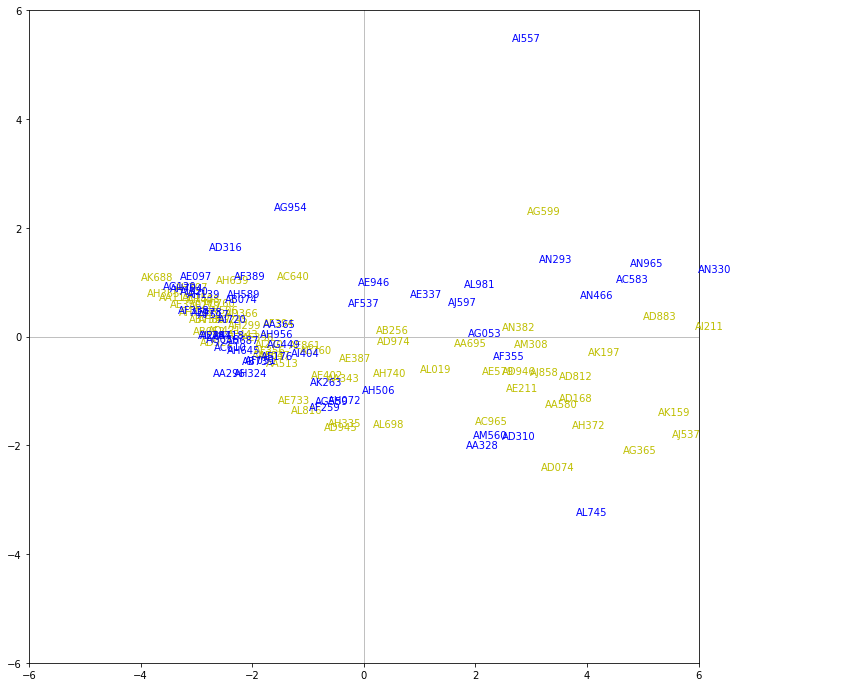

In [132]:
varsupquali = demo_net_spd[['sex']]

#modalités de la variable qualitative

modalites = np.unique(varsupquali)
print(modalites)

#liste des couleurs

couleurs = ['y','b']

#faire un graphique en coloriant les points

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative

for c in range(len(modalites)):
    
    #numéro des individus concernés
    numero = np.where(varsupquali == modalites[c])
    
    #les passer en revue pour affichage
    
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

A gauche du plan, les individus sont confondus, qu'importe leur sexe. En revanche, on observe à droite du centre du plan que les hommes ont plutôt tendance à être dispersés au dessus de l'axe 1 tandis que les femmes sont plutôt représentées en dessous de l'axe 1. L'axe 2 étant fortement expliqué par la dimension agressivité, on peut se demander si les hommes dépressifs n'auraient pas plus tendance à être agressifs que les femmes dépressives. 

Réalisons maintenant la 2ème ACP, concernant les tempéraments et caractères du TCI

In [150]:
print(X.columns)

Index(['shaps_score', 'psqi_score', 'ctq_denial_score', 'ctq_emoabuse_score',
       'ctq_emoneglect_score', 'ctq_physabuse_score', 'ctq_physneglect_score',
       'ctq_sexabuse_score', 'ctq_score', 'madrs_score', 'hamd_hamd17_score',
       'hama_score', 'poms_score_tension', 'poms_score_depression',
       'poms_score_anger', 'poms_score_fatigue', 'poms_score_friendliness',
       'poms_score_confusion', 'poms_score_vigour', 'poms_score_tmd',
       'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score',
       'qids_score', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_impulsivity_score', 'tristesse_apparente',
       'tristesse_exprimee', 'tension_interieure', 'reduction_sommeil',
       'reduction_appetit', 'difficulte_concentration', 'lassitude',
       'incapacite_ressentir', 'pensee_pessimiste', 'idee_suicidaire'],
      dtype='object')


In [296]:
#sous-ensemble des scores de tci


X = demo_net_spd[['tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score']]

n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")

123 observations et 8 variables.


In [297]:
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("transformation – centrage-réduction")
print(Z)

transformation – centrage-réduction
[[ 0.21839627  0.35066791  0.59231572 -1.41844951  0.31998904  0.32115552
  -1.02449641  0.9257163 ]
 [ 1.13209497  0.57590109 -1.94913196 -0.30718015  0.79418966  0.99833489
   0.0739985  -1.15968855]
 [ 0.03565653 -0.66288138 -0.76312304 -1.41844951 -0.62841221  0.88547166
  -1.3383521  -0.32552661]
 [ 0.58387575  1.3642172  -0.76312304  1.3597239   0.55708935 -0.58175029
  -0.55371288 -0.32552661]
 [ 0.21839627  1.70206696 -0.5936932   0.24845453  0.79418966  0.09542907
   1.01556556 -1.15968855]
 [-1.97448061 -0.66288138 -0.5936932   0.24845453 -0.86551252  0.09542907
  -0.23985719  0.9257163 ]
 [ 0.76661549  0.12543474 -2.11856181  0.80408921 -0.86551252  1.22406134
  -0.71064072 -1.57676953]
 [ 0.76661549  0.23805132  0.08402618 -0.30718015  1.26839028  0.99833489
  -0.08292935 -0.74260758]
 [-0.14708321  1.25160061 -0.5936932  -0.30718015 -0.3913119  -0.69461352
   0.38785418 -1.57676953]
 [-2.33996009  1.25160061 -0.76312304  0.80408921  1.26

In [298]:
#moyenne
print("moyenne")
print(np.mean(Z,axis=0))

#écart-type
print("VERIFICATION ECART TYPE")
print(np.std(Z,axis=0,ddof=0))

moyenne
[ 4.15205359e-17 -5.95729428e-17  3.61048138e-17  1.26366848e-17
  1.08314441e-17 -1.78718828e-16 -8.84567938e-17  9.74829973e-17]
VERIFICATION ECART TYPE
[1. 1. 1. 1. 1. 1. 1. 1.]


In [299]:
 #calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print("nombre de composantes calculées")
print(acp.n_components_)

nombre de composantes calculées
8


In [300]:
#variance corrigée
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print("valeur corrigée")
print(eigval)

valeur corrigée
[2.46416807 2.08620158 1.05556867 0.9355084  0.61846427 0.36273911
 0.25908221 0.2182677 ]


In [301]:
#proportion de variance expliquée - axes
print("proportion de variance expliquée - axes")
print(acp.explained_variance_ratio_)

proportion de variance expliquée - axes
[0.30802101 0.2607752  0.13194608 0.11693855 0.07730803 0.04534239
 0.03238528 0.02728346]


Le premier axe explique 31% de l'information, ce qui est inférieur au seuil de pourcentage d'inertie à 36.1% que l'on a fixé plus tôt. Les variables sont donc indépendantes. 

Réalisons maintenant l'ACP pour les échelles du CTQ :


123 observations et 7 variables.
VALEURS CENTREES ET REDUITES
[[ 0.70845125 -0.72276622 -0.71892219 -0.21976227 -0.64371497 -0.00912539
  -0.61316989]
 [ 0.12557831 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [ 0.70845125 -0.72276622 -0.71892219 -0.85578013 -0.64371497 -0.4580948
  -0.86948219]
 [ 1.58276064 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [-0.45729462  0.09283236  0.54132621 -0.5377712   0.04478017 -0.4580948
  -0.0364672 ]
 [-0.74873108 -0.11106729  1.38149181  0.73426452  0.73327532  2.90917571
   1.50140664]
 [ 0.41701478 -0.72276622 -0.92896359 -0.21976227 -0.64371497 -0.4580948
  -0.80540412]
 [ 0.70845125 -0.72276622 -0.92896359 -0.85578013 -0.64371497 -0.4580948
  -0.93356027]
 [ 0.41701478 -0.72276622 -0.71892219 -0.21976227 -0.2994674  -0.4580948
  -0.67724796]
 [-1.33160402  2.74352775  1.59153321  4.8683806   1.76601804 -0.4580948
   2.52665586]
 [ 0.70845125 -0.31496693 -0.71892219 -0.21976227 -0.643

7
La matrice des valeurs singulières est créée.
[4.59517666e+00 8.14506522e-01 6.21906429e-01 4.21212131e-01
 3.08644407e-01 2.38553852e-01 2.21681941e-32]
proportion de variante expliquée
[6.56453808e-01 1.16358075e-01 8.88437756e-02 6.01731616e-02
 4.40920581e-02 3.40791218e-02 3.16688487e-33]
Le premier axe explique 66.0% de la variance, le second 12.0%. De plus l'ACP est faisable au regard du pourcentage d'inertie à 40% pour 95% des valeurs si indépendance entre variables pour plus de 100 individus et 7 variables.


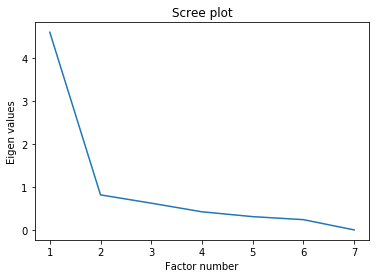

Les valeurs propres sont supérieures à 1 au premier. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente unéventuel intérêt.
     Val.Propre    Seuils
0  4.595177e+00  2.592857
1  8.145065e-01  1.592857
2  6.219064e-01  1.092857
3  4.212121e-01  0.759524
4  3.086444e-01  0.509524
5  2.385539e-01  0.309524
6  2.216819e-32  0.142857
La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des bâtons brisés q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes


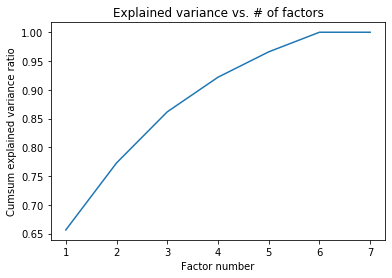

Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points


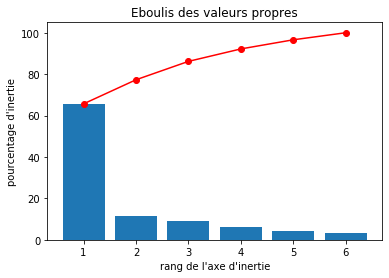

Le premier facteur contient 66.0% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de 77.0% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.


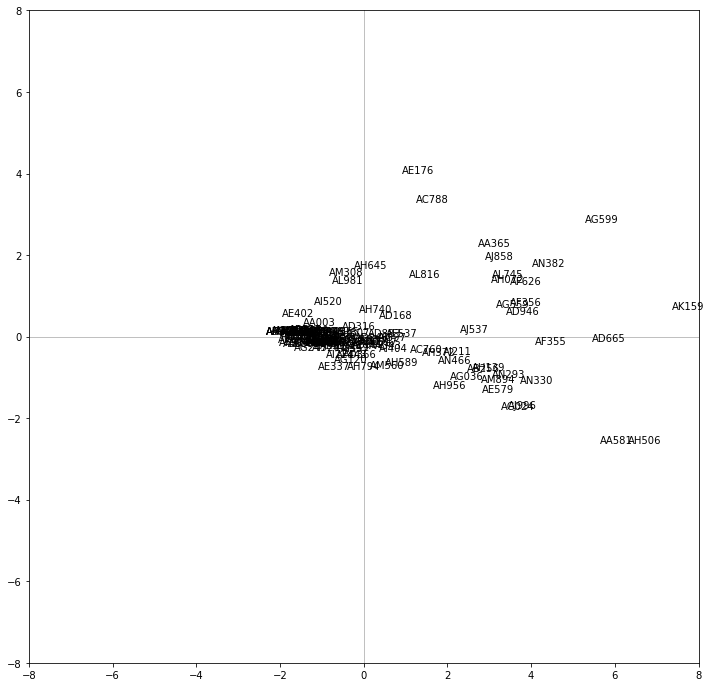

Un groupe d'individus est concentré au milieu du plan. Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, le reste de la population est dispersé de part et d'autres à droite du 1er axe.
contribution des individus dans l'inertie totale
        ID        d_i
106  AK159  59.516864
84   AH506  50.236939
9    AA581  45.246882
73   AG599  36.983567
29   AD665  31.449919
120  AN382  21.763692
55   AF355  21.117360
65   AG024  20.470053
105  AJ996  18.902118
38   AE176  18.599112
119  AN330  17.721397
118  AN293  15.627768
34   AD946  15.197696
62   AF626  15.110524
45   AE579  14.881567
5    AA365  14.275816
56   AF356  13.235309
75   AH072  13.117528
104  AJ858  13.068507
20   AC788  12.914809
112  AL745  12.272515
117  AM894  11.494046
72   AG559  11.182386
13   AB256  10.205485
66   AG036   9.530044
94   AI211   8.479185
76   AH139   8.372843
40   AE337   8.215848
102  AJ537   7.649976
93   AH956   7.466311
121  AN466   7.013118
23 

<ipython-input-9-ce7e966e112c>:205: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
<ipython-input-9-ce7e966e112c>:210: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-9-ce7e966e112c>:215: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-9-ce7e966e112c>:218: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de 70% à l'axe 1. " + str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-9-ce7e966e112c>:221: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .COR_1 >= 0.7)].id)[:1]) + " étant la variable avec le coefficient le plus élevé soit " + str(l

['ctq_sexabuse_score'] est la variable qui corrèle à plus de 70% à l'axe 2
['ctq_score', 'ctq_emoabuse_score', 'ctq_emoneglect_score', 'ctq_physneglect_score', 'ctq_physabuse_score'] sont les variables qui corrèlent à plus de 70% à l'axe 1. ['ctq_score'] étant la variable avec le coefficient le plus élevé soit [99.0]%


['ctq_denial_score'] est la variable qui corrèle à moins de -60% à l'axe 1


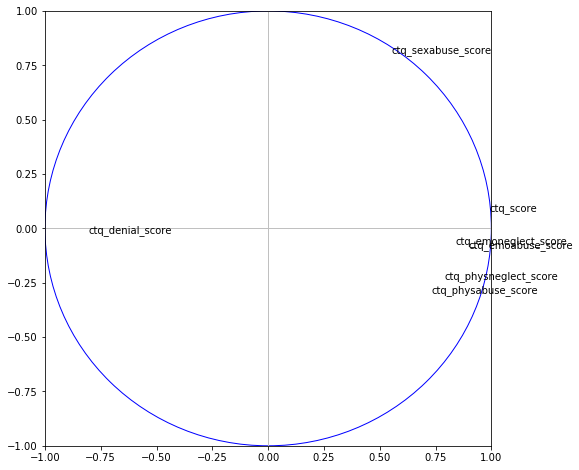

Qualité de représentation des variables
                      id    COS2_1    COS2_2
0       ctq_denial_score  0.645050  0.000418
1     ctq_emoabuse_score  0.801968  0.007800
2   ctq_emoneglect_score  0.703015  0.004819
3    ctq_physabuse_score  0.538891  0.088785
4  ctq_physneglect_score  0.620833  0.054644
5     ctq_sexabuse_score  0.305935  0.651958
6              ctq_score  0.979484  0.006083
Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont ['ctq_emoabuse_score', 'ctq_emoneglect_score', 'ctq_sexabuse_score', 'ctq_score']. Leur représentation dans le cercle des corrélations est fiable

Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont ['ctq_denial_score', 'ctq_physabuse_score', 'ctq_physneglect_score']. Leur représentation dans le cercle des corrélations n'est pas fiable
verifions la théorie cos2var
[1. 1. 1. 1. 1. 1. 1.]
                      id     CTR_1     CTR_2     somme
0       ctq_denial_score  0.140375 

In [9]:
#sous-ensemble des scores des variables ctq


X = demo_net_spd.filter(regex=("ctq.*"))


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")


#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES ET REDUITES")
print(Z)

#vérification moyenne
print(np.mean(Z,axis=0))

#vérification écart-type
print(np.std(Z,axis=0,ddof=0))

from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

print("La matrice des valeurs singulières est créée.")

#variances (valeurs propres) associées aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variante expliquée")
print(acp.explained_variance_ratio_)

print("Le premier axe explique "+ 
      str(round(acp.explained_variance_ratio_[0],2)*100) + 
      "% de la variance, le second " + 
      str(round(acp.explained_variance_ratio_[1],2)*100) + 
      "%. De plus l'ACP est faisable au regard du pourcentage d'inertie à 40% pour 95% des valeurs si indépendance entre variables pour plus de 100 individus et 7 variables.")

#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

print("Les valeurs propres sont supérieures à 1 au premier. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente unéventuel intérêt.")

#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


print("La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des bâtons brisés q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes")


#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

print("Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points")

from sklearn import decomposition
from sklearn import preprocessing
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

    
# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

print("Le premier facteur contient " + 
      str(round(acp.explained_variance_ratio_[0],2)*100) +
      "% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de " +
      str(round(acp.explained_variance_ratio_[0] + acp.explained_variance_ratio_[1] ,2)*100) +
      "% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.")

#Représentation des individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-8,8) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

print("Un groupe d'individus est concentré au milieu du plan."
      " Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, "
      "le reste de la population est dispersé de part et d'autres "
      "à droite du 1er axe.")


#afficher le df en entier
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
df_di = pd.DataFrame({'ID':X.index,'d_i':di})
print("contribution des individus dans l'inertie totale")
print(df_di.sort_values(by='d_i', ascending = False))

#vérifions la somme des di

print(np.sum(di,axis=0))


print("L'individu AK159 et AH506 pèsent le plus pour la détermination du facteur 1, on les retrouve par ailleurs aux extrémités de notre nuage de points. Nous pouvons alors déduire la qualité de représentation des individus pour les deux facteurs")


print("Qualité de représentation – Les COS² (cosinus carré).")
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

cos2_sum = pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'somme':cos2[:,0]+cos2[:,1]})
cos2_sum.sort_values(by = 'somme',ascending = False)

#proportion des individus ayant une corrélation avec les axes supérieure à 0.7 
ab = (cos2_sum.somme >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus ont une corrélation aux 2 axes supérieure à 0.7. Ce sont ceux qui sont bien projetés")


#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

#vérifions la théorie
print("vérifions la théorie - somme en colonne des CTR")
print(np.sum(ctr,axis=0))

#Représentation des variables

#le champ components_ de l'objet ACP
print(acp.components_)
#les facteurs sont en ligne, les variables en colonne

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

#Les variables sont maintenant en ligne, les facteurs en colonne :


#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
               .sort_values(by = 'COR_2', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
                 .COR_2 >= 0.7)].id)) + " est la variable qui corrèle à plus de 70% à l'axe 2")

list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)

print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de 70% à l'axe 1. " + str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)[:1]) + " étant la variable avec le coefficient le plus élevé soit " + str(list(round(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                     .sort_values(by = 'COR_1', ascending = False)
                     [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                       .COR_1 >= 0.7)].COR_1*100,1)[:1])) + "%" )
print()
print()
print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 <= -0.6)].id)) + " est la variable qui corrèle à moins de -60% à l'axe 1")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#qualité de représentation des variables
print("Qualité de représentation des variables")

#cosinus carré des variables
cos2var = corvar**2
cos2var_df = pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
print(cos2var_df)
cos2var_df = pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'somme':cos2var[:,0]+cos2var[:,1]})
cos2var_df.sort_values(by = 'somme',ascending = False)


print("Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont " + str(list(cos2var_df[(cos2var_df.somme >= 0.7)].id)) +". Leur représentation dans le cercle des corrélations est fiable")
print("")

var_rpz_insuf = list(cos2var_df[(cos2var_df.somme < 0.7)].id)

print("Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont " + str(var_rpz_insuf) +". Leur représentation dans le cercle des corrélations n'est pas fiable")

#vérifions la théorie
print("verifions la théorie cos2var")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1
#donc qualité de représentation des variables bonne

#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
ctrvar_df = pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'somme':ctrvar[:,0]+ctrvar[:,1]})
ctrvar_df.sort_values(by = 'somme',ascending = False)
print(ctrvar_df)
list(ctrvar_df.sort_values(by = 'somme',ascending = False).id)[:2]

print("vérifions la théorie ctrvar")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes sont égales à 1 cette fois-ci.

La projection des variables ctq_denial_score, ctq_physabuse_score et ctq_physneglect_score ne sont pas représentatives. Nous ne les prenons pas en compte dans l'analyse.
La variance est expliquée à 66% par le premier axe et à 12% par le second. 
La corrélation entre le score global au CTQ et l'axe 1, tout comme sa représentativité sur le cercle, avoisinne 1. Ainsi, l'axe 1 semble représenter le CTQ score. Les variables relatives aux scores de la négligence émotionnelle, de l'abus émotionnel sont fortement corrélées au 1er axe. Les individus se trouvant à droite du plan ont donc un score élevé aux échelles des abus et négligences émotionnelles ainsi qu'au score global. Au vue des corrélations à l'axe 1, on peut aussi penser que dans notre échantillon, les individus auraient moins subi d'abus sexuels et d'abus physiques que d'abus et de négligences émotionnels.
La variable relative à l'abus sexuel expliquerait fortement le 2nd axe. Les individus se situant en haut du plan devraient donc avoir des scores élevé à cette variable.

Ajoutons les variables supplémentaires qualitatives sex et Diag 

['Female' 'Male']


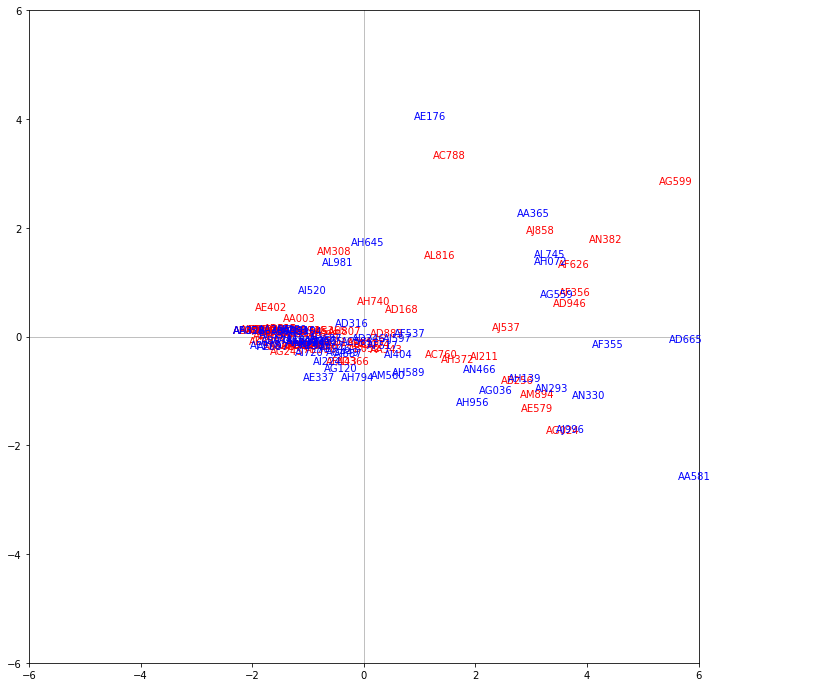

In [11]:
varsupquali = demo_net_spd[['sex']]

#modalités de la variable qualitative

modalites = np.unique(varsupquali)
print(modalites)

#liste des couleurs

couleurs = ['r','b']

#faire un graphique en coloriant les points

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative

for c in range(len(modalites)):
    
    #numéro des individus concernés
    numero = np.where(varsupquali == modalites[c])
    
    #les passer en revue pour affichage
    
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

Le sexe de l'individu ne semble pas avoir de lien avec la survenue de traumatismes durant l'enfance.

['HC' 'MDD']


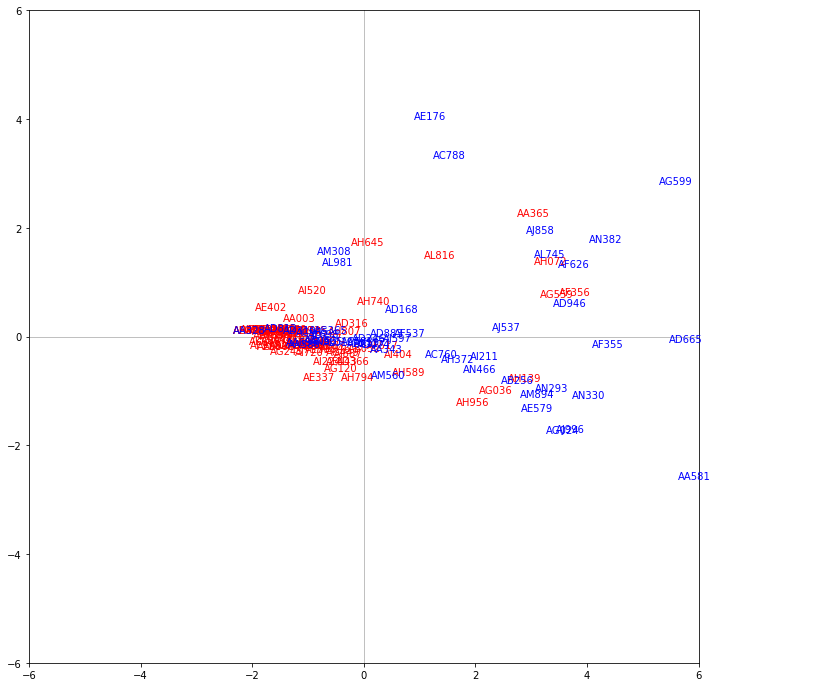

In [10]:
varsupquali = demo_net_spd[['Diag']]

#modalités de la variable qualitative

modalites = np.unique(varsupquali)
print(modalites)

#liste des couleurs

couleurs = ['r','b']

#faire un graphique en coloriant les points

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative

for c in range(len(modalites)):
    
    #numéro des individus concernés
    numero = np.where(varsupquali == modalites[c])
    
    #les passer en revue pour affichage
    
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

En revanche, avoir subi des traumatismes durant l'enfance semble augmenter le risque de souffrir de dépression à l'âge adulte. Effectivement, les individus se situant à droite dans le plan, donc qui ont des scores plus élevés au CTQ, appartiennent pour la majorité au groupe MDD. A gauche du plan, il semblerait y avoir plus d'individus sains, mais la différence parait moins importante, d'autant plus que notre échantillon est comopsé d'une majorité d'individus sains. 

Réalisons une ACP avec les variables qui étaient mal projetées dans les autres acp effectuée. 

123 observations et 6 variables.
VALEURS CENTREES ET REDUITES
[[ 0.10032855 -0.21995442 -0.86901613 -0.99468579 -0.9886444  -0.47316022]
 [-0.88690434  1.43643703  1.36057003 -0.99468579 -0.9886444  -0.47316022]
 [-0.88690434 -1.14017189 -0.60671187 -0.99468579 -0.9886444  -0.47316022]
 [-0.88690434 -0.58804141 -0.86901613  1.60842809 -0.01581831 -0.47316022]
 [ 0.10032855  0.14813257 -0.08210336  0.74072346 -0.01581831 -0.47316022]
 [-0.72236553  1.25239353  1.36057003 -0.12698116  0.95700777 -0.47316022]
 [-0.88690434  0.33217606  0.04904876 -0.99468579 -0.9886444  -0.47316022]
 [-0.3932879  -0.40399791  0.04904876 -0.99468579 -0.01581831 -0.47316022]
 [ 1.74571669 -0.40399791 -1.00016825  0.74072346  1.92983386  1.46679669]
 [ 2.56841076 -0.9561284  -1.00016825 -0.12698116  0.95700777  1.46679669]
 [ 1.25210025  0.70026305  1.09826578  1.60842809  0.95700777 -0.47316022]
 [-0.72236553  0.14813257  0.44250514 -0.99468579 -0.9886444  -0.47316022]
 [-0.88690434  0.51621956  1.49172216 

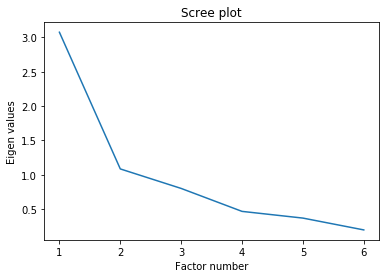

Les valeurs propres sont supérieures à 1 jusqu'au 2ème axe. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente unéventuel intérêt.
   Val.Propre    Seuils
0    3.074244  2.450000
1    1.085984  1.450000
2    0.802100  0.950000
3    0.468256  0.616667
4    0.370733  0.366667
5    0.198683  0.166667
La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des bâtons brisés q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes


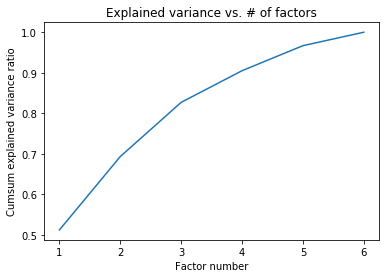

Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points


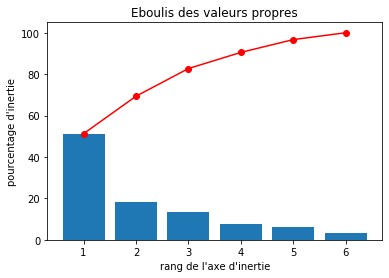

Le premier facteur contient 51.0% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de 69.0% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.


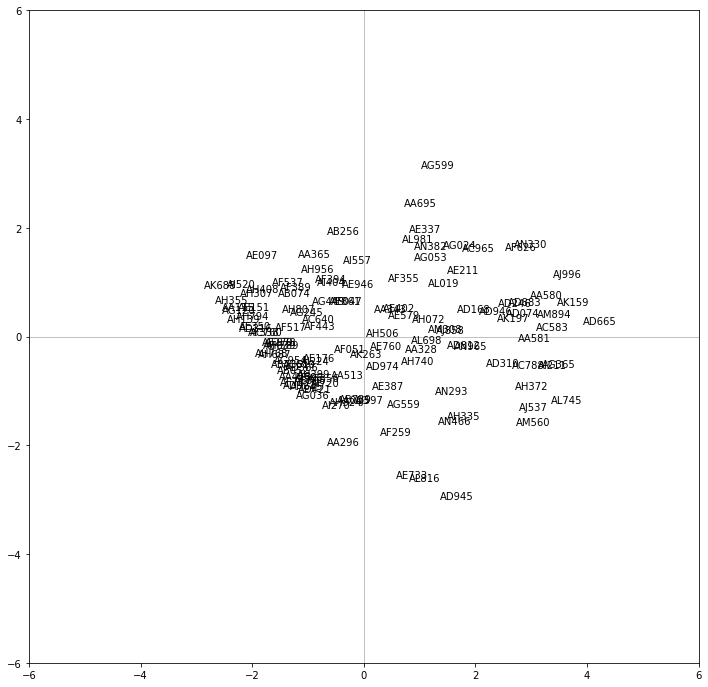

Un groupe d'individus est concentré au milieu du plan. Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, le reste de la population est dispersé de part et d'autres à droite du 1er axe.
contribution des individus dans l'inertie totale
        ID        d_i
112  AL745  21.109168
116  AM560  19.814325
70   AG365  19.764483
62   AF626  19.383244
106  AK159  17.144888
24   AD246  16.391788
29   AD665  15.727353
105  AJ996  15.670653
16   AC583  13.097262
99   AI520  12.772899
20   AC788  12.769049
33   AD945  12.383944
73   AG599  12.193516
117  AM894  12.088762
94   AI211  12.000114
119  AN330  11.596430
9    AA581  11.594733
8    AA580  10.635500
102  AJ537  10.256331
107  AK197  10.203836
31   AD883   9.420338
22   AD074   9.396686
109  AK688   9.310213
40   AE337   9.061266
113  AL816   8.963564
61   AF537   8.922633
36   AE097   8.870118
82   AH372   8.774875
46   AE733   8.543636
121  AN466   8.063837
81   AH355   7.674370
80 

<ipython-input-34-a5d05a18788e>:206: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
<ipython-input-34-a5d05a18788e>:211: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-34-a5d05a18788e>:216: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-34-a5d05a18788e>:219: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de +70% à l'axe 1. " + str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-34-a5d05a18788e>:222: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  .COR_1 >= 0.7)].id)[:1]) + " étant la variable avec le coefficient le plus élevé soit " +

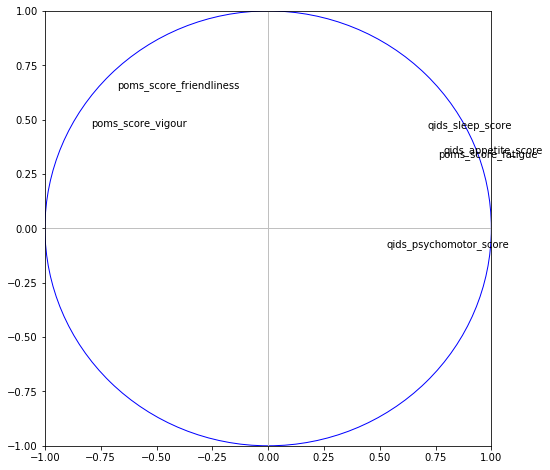

Qualité de représentation des variables
                        id    COS2_1    COS2_2     somme
1  poms_score_friendliness  0.457493  0.415573  0.873067
2        poms_score_vigour  0.625951  0.220970  0.846921
4      qids_appetite_score  0.619955  0.122285  0.742240
3         qids_sleep_score  0.511013  0.212154  0.723167
0       poms_score_fatigue  0.577942  0.107516  0.685458
5   qids_psychomotor_score  0.281890  0.007486  0.289375
Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont ['poms_score_friendliness', 'poms_score_vigour', 'qids_sleep_score', 'qids_appetite_score']. Leur représentation dans le cercle des corrélations est fiable

Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont ['poms_score_fatigue', 'qids_psychomotor_score']. Leur représentation dans le cercle des corrélations n'est pas fiable
verifions la théorie cos2var
[1. 1. 1. 1. 1. 1.]
vérifions la théorie ctrvar
[1. 1. 1. 1. 1. 1.]


In [34]:
#sous-ensemble des scores des variables poms et qids mal representees


X = demo_net_spd[['poms_score_fatigue', 'poms_score_friendliness', 'poms_score_vigour', 
                 'qids_sleep_score', 'qids_appetite_score', 'qids_psychomotor_score']]


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")


#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES ET REDUITES")
print(Z)

#vérification moyenne
print(np.mean(Z,axis=0))

#vérification écart-type
print(np.std(Z,axis=0,ddof=0))

from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

print("La matrice des valeurs singulières est créée.")

#variances (valeurs propres) associées aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variante expliquée")
print(acp.explained_variance_ratio_)

print("Le premier axe explique "+ 
      str(round(acp.explained_variance_ratio_[0],2)*100) + 
      "% de la variance, le second " + 
      str(round(acp.explained_variance_ratio_[1],2)*100) + 
      "%. De plus l'ACP est faisable au regard du pourcentage d'inertie à 25.8% pour 95% des valeurs si indépendance entre variables pour plus de 100 individus et " + str(X.shape[1])+" variables.")

#scree plot - eboulis des valeurs propres
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

print("Les valeurs propres sont supérieures à 1 jusqu'au 2ème axe. Selon le critère du coude, le décrochement se situe au deuxième axe, puis décroissance régulière à partir du deuxième axe : seul le premier axe présente unéventuel intérêt.")

#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


print("La composante est validée si : la vp > seuil si l’inertie était répartie aléatoirement sur les axes, la distribution des v.p. suivrait la loi des bâtons brisés q = 0 soit 1, 1 seul facteur semble suffire dans cette étude par commodité, nous en choisirons 2 axes")


#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

print("Hormis le 1er facteur, les facteurs, pris individuellement, ne contiennent pas beaucoup d'informations. Nous pourrions éventuellement prendre 2 facteurs par commodité pour construire le plan de représentation du nuage de points")

from sklearn import decomposition
from sklearn import preprocessing
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

    
# Calcul des composantes principales
pca = decomposition.PCA(n_components=6)
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

print("Le premier facteur contient " + 
      str(round(acp.explained_variance_ratio_[0],2)*100) +
      "% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de " +
      str(round(acp.explained_variance_ratio_[0] + acp.explained_variance_ratio_[1] ,2)*100) +
      "% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.")

#Représentation des individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

print("Un groupe d'individus est concentré au milieu du plan."
      " Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, "
      "le reste de la population est dispersé de part et d'autres "
      "à droite du 1er axe.")


#afficher le df en entier
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
df_di = pd.DataFrame({'ID':X.index,'d_i':di})
print("contribution des individus dans l'inertie totale")

print (df_di.sort_values(by = 'd_i', ascending = False))
#vérifions la somme des di

print(np.sum(di,axis=0))


print("On ne retrouve pas aux extrêmités les individus qui pèsent le plus pour la détermination de l'inertie totale. Regardons  la qualité de représentation des individus pour les deux facteurs")


print("Qualité de représentation – Les COS² (cosinus carré).")
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

cos2_sum = pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'somme':cos2[:,0]+cos2[:,1]})
cos2_sum.sort_values(by = 'somme',ascending = False)

#proportion des individus ayant une corrélation avec les axes supérieure à 0.7 
ab = (cos2_sum.somme >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus ont une corrélation aux 2 axes supérieure à 0.7. Ceux-sont ceux qui sont bien projetés")


#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

#vérifions la théorie
print("vérifions la théorie - somme en colonne des CTR")
print(np.sum(ctr,axis=0))

#Représentation des variables

#le champ components_ de l'objet ACP
print(acp.components_)
#les facteurs sont en ligne, les variables en colonne

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)

#Les variables sont maintenant en ligne, les facteurs en colonne :


#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
               .sort_values(by = 'COR_2', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
                 .COR_2 >= 0.7)].id)) + " est la variable qui corrèle à plus de 70% à l'axe 2")

list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)

print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de +70% à l'axe 1. " + str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)[:1]) + " étant la variable avec le coefficient le plus élevé soit " + str(list(round(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                     .sort_values(by = 'COR_1', ascending = False)
                     [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                       .COR_1 >= 0.7)].COR_1*100,1)[:1])) + "%" )
print()
print()
print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 <= -0.6)].id)) + " est la variable qui corrèle à moins de -60% à l'axe 1")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#qualité de représentation des variables
print("Qualité de représentation des variables")

#cosinus carré des variables
cos2var = corvar**2
cos2var_df = pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'somme':cos2var[:,0]+cos2var[:,1]})
print(cos2var_df.sort_values(by = 'somme',ascending = False))


print("Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont " + str(list(cos2var_df[(cos2var_df.somme >= 0.7)].id)) +". Leur représentation dans le cercle des corrélations est fiable")
print("")

var_rpz_insuf = list(cos2var_df[(cos2var_df.somme < 0.7)].id)

print("Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont " + str(var_rpz_insuf) +". Leur représentation dans le cercle des corrélations n'est pas fiable")

#vérifions la théorie
print("verifions la théorie cos2var")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1
#donc qualité de représentation des variables bonne

#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
ctrvar_df = pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'somme':ctrvar[:,0]+ctrvar[:,1]})
ctrvar_df.sort_values(by = 'somme',ascending = False)

list(ctrvar_df.sort_values(by = 'somme',ascending = False).id)[:2]

print("vérifions la théorie ctrvar")
print(np.sum(ctrvar,axis=0))
#Les sommes en colonnes sont égales à 1 cette fois-ci.

Un groupe d'individus est concentré au milieu du plan. Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, le reste de la population est dispersé de part et d'autres à droite du 1er axe.
Les variables concernant la modalité troubles psychomoteurs du QIDS et la dimension fatigue du POMS ne sont pas suffisamment bien représentées dans le plan, donc nous ne ferons aucune conjecture à leur sujet. On remarque que les variables vigueur et relations personnelles du POMS sont opposées aux variables appetit et sommeil du QIDS par rapport à l'axe 1. D'ailleurs, les corrélations à l'axe 1 des variables vont dans ce sens. On peut donc supposer qu'obtenir des scores élevés aux dimensions vigueur et relations personnelles du POMS implique des scores moindres aux dimensions sommeil et appétit du QIDS (et inversement). En revanche, les corrélations à l'axe deux sont trop faibles pour déterminer des liens entre les variables et ce facteur.  
On peut suposer que le groupe se situant à gauche a eu des scores plus élevés aux dimensions positives du POMS qu'aux dimensions sus-mentionnées du QIDS, et réciproquement pour les individus se situant à droite. 
Le nuage de points des individus ressemblant sensiblement au nuage de points de la 1ère ACP, on peut également se demander si l'axe 1 ne représente pas dans ce plan également la présence ou non de dépression. V&rifions cela avec l'ajout de la variable supplémentaire relative au diagnostic.

['HC' 'MDD']


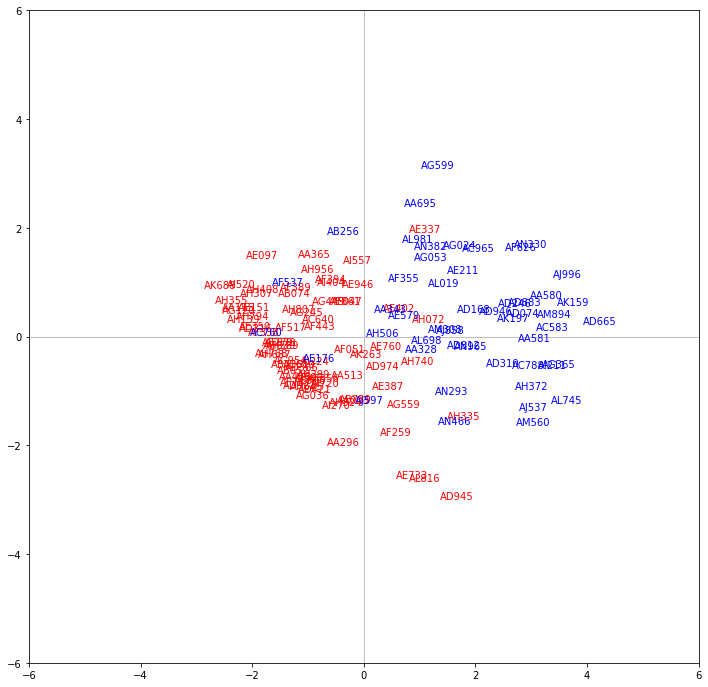

In [35]:
varsupquali = demo_net_spd[['Diag']]

#modalités de la variable qualitative

modalites = np.unique(varsupquali)
print(modalites)

#liste des couleurs

couleurs = ['r','b']

#faire un graphique en coloriant les points

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative

for c in range(len(modalites)):
    
    #numéro des individus concernés
    numero = np.where(varsupquali == modalites[c])
    
    #les passer en revue pour affichage
    
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()

Effectivement, on remarque une séparation nette entre les individus souffrant de dépression et ceux qui n'en souffrent pas. En revanche, si lors de la 1ère acp le milieu de l'axe 1 semblait marquer la distinction entre ces deux modalités, ici, la séparation s'opèrerait plutôt à la coordonnée (1.5,0.0)

123 observations et 10 variables.
VALEURS CENTREES ET REDUITES
[[-0.20227802 -0.56648803  0.21839627 ...  0.32115552 -1.02449641
   0.9257163 ]
 [-1.10197914  0.83574479  1.13209497 ...  0.99833489  0.0739985
  -1.15968855]
 [-0.51371302 -0.5233424   0.03565653 ...  0.88547166 -1.3383521
  -0.32552661]
 ...
 [ 0.6974231  -0.56648803  0.94935523 ...  0.99833489 -1.02449641
  -1.15968855]
 [ 1.42410477  6.14265668 -1.97448061 ... -1.0332032   0.0739985
  -0.74260758]
 [ 2.04697478 -0.58806084  0.21839627 ... -1.93610902 -1.65220779
  -0.74260758]]
[ 2.16628883e-17  7.22096276e-18  4.15205359e-17 -5.95729428e-17
  3.61048138e-17  1.26366848e-17  1.08314441e-17 -1.78718828e-16
 -8.84567938e-17  9.74829973e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)
10
La matrice des valeurs singulières est créée.
[2.98004977 2.08971335 1.2459735  1.01170788 0.92462801 0.58754678
 0.41990285 0.

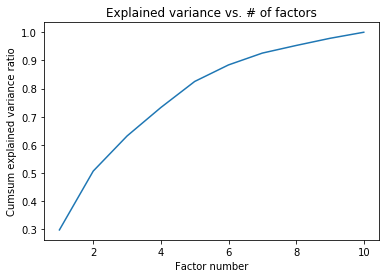

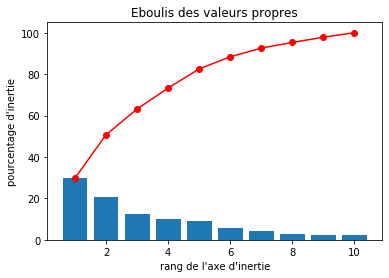

Le premier facteur contient 30.0% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de 51.0% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.


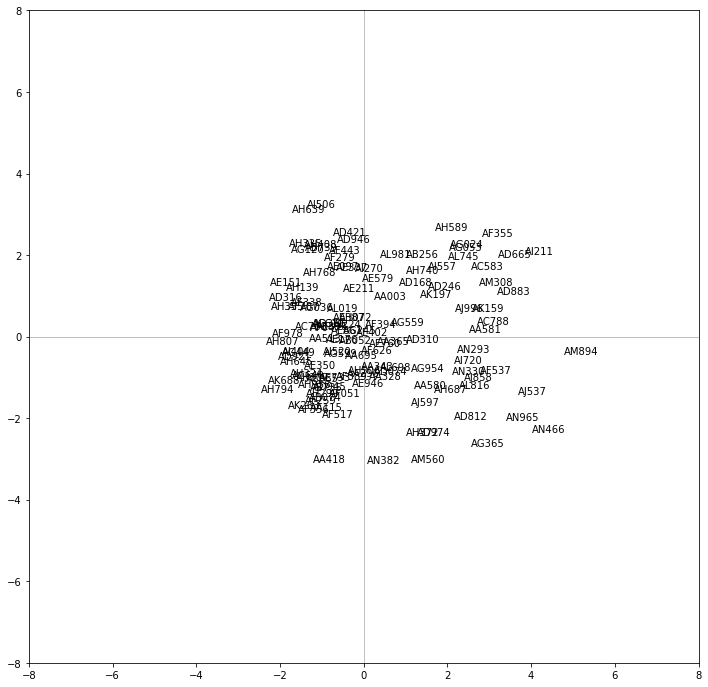

Un groupe d'individus est concentré au milieu du plan. Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, le reste de la population est plutôt dispersée à droite du 1er axe.
contribution des individus dans l'inertie totale
        ID        d_i
0    AA003   5.007404
1    AA115  10.397367
2    AA296   6.648943
3    AA328   5.830096
4    AA343   6.572865
5    AA365   7.618613
6    AA418  11.568620
7    AA513   4.242016
8    AA580   5.811847
9    AA581  16.712946
10   AA695   2.263660
11   AB052   5.620787
12   AB074   5.636438
13   AB256  14.820070
14   AB735   4.440848
15   AB739  12.717591
16   AC583  13.507150
17   AC610   3.492665
18   AC640   6.565450
19   AC760  11.245543
20   AC788  10.827890
21   AC965   5.085441
22   AD074   2.378876
23   AD168   6.247442
24   AD246  12.184216
25   AD310   3.841873
26   AD316   6.514335
27   AD366   3.408700
28   AD421  11.271955
29   AD665  16.612166
30   AD812  15.546280
31   AD883  19.

<ipython-input-17-9b79be1e39cc>:198: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
<ipython-input-17-9b79be1e39cc>:203: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-17-9b79be1e39cc>:208: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
<ipython-input-17-9b79be1e39cc>:215: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})


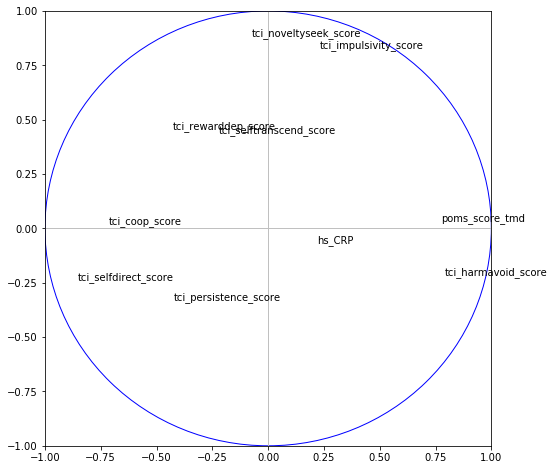

Qualité de représentation des variables
                        id    COS2_1    COS2_2     somme
4    tci_noveltyseek_score  0.005670  0.782637  0.788308
7     tci_selfdirect_score  0.728664  0.055162  0.783826
9    tci_impulsivity_score  0.053937  0.691647  0.745584
3      tci_harmavoid_score  0.624539  0.045504  0.670043
0           poms_score_tmd  0.598529  0.001168  0.599697
2           tci_coop_score  0.511483  0.000459  0.511942
6      tci_rewarddep_score  0.184283  0.208250  0.392533
5    tci_persistence_score  0.177257  0.106562  0.283819
8  tci_selftranscend_score  0.048019  0.193846  0.241864
1                   hs_CRP  0.047669  0.004478  0.052147
Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont ['tci_noveltyseek_score', 'tci_selfdirect_score', 'tci_impulsivity_score']. Leur représentation dans le cercle des corrélations est fiable

Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont ['ctq_denial_score', 

In [17]:
#sous-ensemble des scores des variables sélectionnées - vérification d'indépendance des variables


X = demo_net_spd[['poms_score_tmd', 'hs_CRP', 'tci_coop_score', 'tci_harmavoid_score',
       'tci_noveltyseek_score', 'tci_persistence_score', 'tci_rewarddep_score',
       'tci_selfdirect_score', 'tci_selftranscend_score',
       'tci_impulsivity_score']]


n = X.shape[0]
p = X.shape[1]
print(str(n) + " observations et " + str(p) + " variables.")


#classe pour standardisation
from sklearn.preprocessing import StandardScaler


#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print("VALEURS CENTREES ET REDUITES")
print(Z)

#vérification moyenne
print(np.mean(Z,axis=0))

#vérification écart-type
print(np.std(Z,axis=0,ddof=0))

from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

print("La matrice des valeurs singulières est créée.")

#variances (valeurs propres) associées aux axes factoriels
n = X.shape[0]
p = X.shape[1]
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

#proportion de variance expliquée - axes
print("proportion de variante expliquée")
print(acp.explained_variance_ratio_)

print("Le premier axe explique "+ 
      str(round(acp.explained_variance_ratio_[0],2)*100) + 
      "% de la variance, le second " + 
      str(round(acp.explained_variance_ratio_[1],2)*100) + 
      "%. De plus l'ACP n'est pas faisable au regard du pourcentage d'inertie à 31% d' indépendance entre variables pour plus de 100 individus et 10 variables. Les variables seraient donc à priori indépendantes.")

#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


print("La composante est validée si la valeur propre est supérieure au seuil.2 facteurs semblent suffire dans cette étude.")


#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

from sklearn import decomposition
from sklearn import preprocessing
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

    
# Calcul des composantes principales
pca = decomposition.PCA(n_components=X.shape[1])
pca.fit(Z)

# Eboulis des valeurs propres
display_scree_plot(pca)

print("Le premier facteur contient " + 
      str(round(acp.explained_variance_ratio_[0],2)*100) +
      "% de l'inertie, cumulé au 2ème facteur, ils contiennent à eux 2 près de " +
      str(round(acp.explained_variance_ratio_[0] + acp.explained_variance_ratio_[1] ,2)*100) +
      "% de l'inertie. Nous allons effectuer la représentation du nuage de points avec 2 axes.")

#Représentation des individus

#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-8,8) #même limites en abscisse
axes.set_ylim(-8,8) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-8,8],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-8,8],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

print("Un groupe d'individus est concentré au milieu du plan."
      " Ce groupe parait donc homogène par rapport à certaines caractéristiques. En dehors de ce groupe d'individus, "
      "le reste de la population est plutôt dispersée "
      "à droite du 1er axe.")


#afficher le df en entier
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None) 

#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
df_di = pd.DataFrame({'ID':X.index,'d_i':di})
print("contribution des individus dans l'inertie totale")
print(df_di)
print(df_di['d_i'].max())


#vérifions la somme des di

print(np.sum(di,axis=0))


print("Les individus AN466 et AI520 pèsent le plus pour la détermination du facteur 1, on ne retrouve par ailleurs pas aux extrémités de notre nuage de points l'individu AI520, bien qu'il ait le plus gros poids. Regardons la qualité de représentation des individus pour les deux facteurs")


print("Qualité de représentation – Les COS² (cosinus carré).")
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

cos2_sum = pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'somme':cos2[:,0]+cos2[:,1]})
cos2_sum.sort_values(by = 'somme',ascending = False)

#proportion des individus ayant une corrélation avec les axes supérieure à 0.7 
ab = (cos2_sum.somme >=0.7)
print(str(round(len(cos2_sum[ab])/cos2_sum.shape[0]*100,1)) + " % des individus ont une corrélation aux 2 axes supérieure à 0.7. La qualité de représentation des individus dans le nuage de points n'est pas bonne.")


#vérifions la théorie - somme en ligne des cos2 = 1
print("vérifions la théorie - somme en ligne des cos2 = 1")
print(np.sum(cos2,axis=1))

#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

#vérifions la théorie
print("vérifions la théorie - somme en colonne des CTR")
print(np.sum(ctr,axis=0))

#Représentation des variables

#le champ components_ de l'objet ACP
print(acp.components_)
#les facteurs sont en ligne, les variables en colonne

#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#Les variables sont maintenant en ligne, les facteurs en colonne :

print()
print()

#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

print(str(list(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
               .sort_values(by = 'COR_2', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_2':corvar[:,1]})
                 .COR_2 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de 70% à l'axe 2")

list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)

print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 >= 0.7)].id)) + " sont les variables qui corrèlent à plus de +70% à l'axe 1. ")
                                                                                                                                                                                                                   
print()                                                                                                        
print()                                                                                                             
print(str(list(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
               .sort_values(by = 'COR_1', ascending = False)
               [(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0]})
                 .COR_1 <= -0.6)].id)) + " sont les variables qui corrèlent à moins de -60% à l'axe 1")

#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

#qualité de représentation des variables
print("Qualité de représentation des variables")

#cosinus carré des variables
cos2var = corvar**2
cos2var_df = pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1],'somme':cos2var[:,0]+cos2var[:,1]})
print(cos2var_df.sort_values(by = 'somme',ascending = False))


print("Les variables ayant une somme de COS_1 et COS_2 au carré supérieures à 0.7 sont " + str(list(cos2var_df[(cos2var_df.somme >= 0.7)].id)) +". Leur représentation dans le cercle des corrélations est fiable")
print("")


print("Les variables ayant une somme de COS_1 et COS_2 au carré strictement inférieures à 0.7 sont " + str(var_rpz_insuf) +". Leur représentation dans le cercle des corrélations n'est pas fiable")

#vérifions la théorie
print("verifions la théorie cos2var")
print(np.sum(cos2var,axis=1))
#La somme des COS² en ligne est égale à de 1
#donc qualité de représentation des variables bonne

#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]

#on n'affiche que pour les deux premiers axes
ctrvar_df = pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1],'somme':ctrvar[:,0]+ctrvar[:,1]})
ctrvar_df.sort_values(by = 'somme',ascending = False)

list(ctrvar_df.sort_values(by = 'somme',ascending = False).id)[:2]

print("vérifions la théorie ctrvar")
print(np.sum(ctrvar,axis=0))

La proportion d'inertie nous indiquait que les variables étaient indépendantes, nous avons tout de même réalisé l'ACP afin de vérifier les caractéristiques des variables entre-elles. D'abord, la projection des individus dans le nuage de points n'étant pas fiable, nous ne ferons donc aucune interprétation à ce sujet. Les variables POMS score et TCI évitement du danger sont corrélées positivement à l'axe 1, tandis que les variables recherche de la nouveauté et détermination y sont corrélées négativement. Ces premières variables étant corrélées positivement à la dépression, on peut se demander si avoir tendance à être déterminé et rechercher la nouveauté ne seraient pas des caractéristiques protectrices pour la dépression. Pour l'axe 2, ce sont les variables recherche de la nouveauté et impulsivité du TCI qui y sont corrélées positivement. On peut aussi relever le fait que seules les variables rechercche de la nouveauté, impulsivité et détermination sont bien représentées dans le cercle des corrélations.
